In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute,__version__,compile,Aer,IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools import visualization
from qiskit.tools.monitor import job_monitor,backend_monitor
import time
import numpy as np
from pprint import pprint
import pdflatex
%matplotlib inline

In [2]:
# Import your API

import sys, getpass
try:
    sys.path.append("../../") # go to parent dir
    import Qconfig
    qx_config = {
        "APItoken": Qconfig.APItoken,
        "url": Qconfig.config['url']}
    print('Qconfig loaded from %s.' % Qconfig.__file__)
except:
    APItoken = getpass.getpass('Please input your token and hit enter: ')
    qx_config = {
        "APItoken": APItoken,
        "url":"https://quantumexperience.ng.bluemix.net/api"}
    print('Qconfig.py not found in qiskit-tutorial directory; Qconfig loaded using user input.')

Qconfig loaded from C:\Users\yuluwang\Documents\APS Meeting\Qconfig.py.


In [3]:
# Show the list of real quantum computers

IBMQ.enable_account(qx_config['APItoken'], qx_config['url'])
IBMQ.backends()

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

In [4]:
Aer.backends()

[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>]

In [5]:
# Check machine state

for i in IBMQ.backends():
    pprint(i.status())

BackendStatus(backend_name='ibmqx4', backend_version='1.0.0', operational=True, pending_jobs=2, status_msg='active')
BackendStatus(backend_name='ibmqx2', backend_version='1.0.0', operational=True, pending_jobs=0, status_msg='active')
BackendStatus(backend_name='ibmq_16_melbourne', backend_version='1.0.0', operational=True, pending_jobs=41, status_msg='active')
BackendStatus(backend_name='ibmq_qasm_simulator', backend_version='0.1.547', operational=True, pending_jobs=0, status_msg='active')


In [6]:
# Assign your backends

#backend = least_busy(IBMQ.backends(simulator=False))
backend = IBMQ.get_backend("ibmq_16_melbourne")            # run on real machine
backend_sim = Aer.get_backend('qasm_simulator') # run on local simulator by default

In [14]:
backend_monitor(backend)

ibmq_16_melbourne
Configuration
-------------
    n_qubits: 14
    operational: True
    status_msg: active
    pending_jobs: 2
    basis_gates: ['u1', 'u2', 'u3', 'cx', 'id']
    local: False
    simulator: False
    n_registers: 1
    credits_required: True
    open_pulse: False
    backend_version: 1.0.0
    description: 14 qubit device
    online_date: 2018-11-06T05:00:00+00:00
    memory: False
    max_experiments: 75
    max_shots: 8192
    allow_q_object: True
    coupling_map: [[1, 0], [1, 2], [2, 3], [4, 3], [4, 10], [5, 4], [5, 6], [5, 9], [6, 8], [7, 8], [9, 8], [9, 10], [11, 3], [11, 10], [11, 12], [12, 2], [13, 1], [13, 12]]
    backend_name: ibmq_16_melbourne
    url: None
    sample_name: albatross
    conditional: False

Qubits [Name / Freq / T1 / T2 / U1 err / U2 err / U3 err / Readout err]
-----------------------------------------------------------------------
    Q0 / 5.10008 GHz / 55.54928 µs / 20.18266 µs / 0.0 / 0.00132 / 0.00263 / 0.1342
    Q1 / 5.23854 GHz / 46

# N=2 Grover Search - Phase Oracle - Qubits: 3, 4

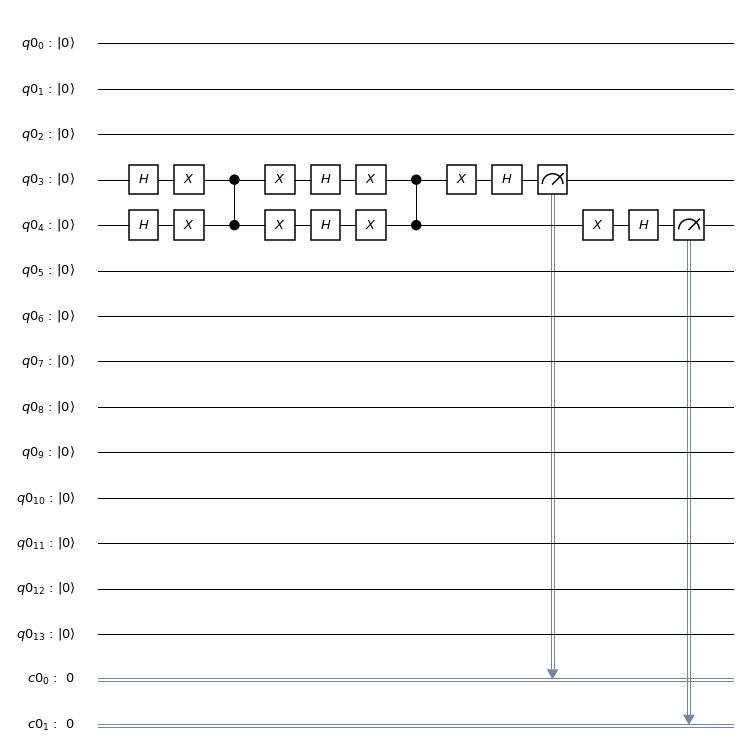

In [15]:
# N=2 Grover Search - Phase Oracle - Marked Item (00) - Qubits: 3, 4
qr = QuantumRegister(14)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[3])
qc.h(qr[4])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[3])
    qc.x(qr[4])
    qc.cz(qr[4],qr[3])
    qc.x(qr[3])
    qc.x(qr[4])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[3])
    qc.x(qr[4])
    qc.x(qr[3])

    qc.cz(qr[4],qr[3])
    
    qc.x(qr[4])
    qc.x(qr[3])
    qc.h(qr[4])
    qc.h(qr[3])

for j in range(1):        
    repeat()

qc.measure(qr[3],cr[0])
qc.measure(qr[4],cr[1])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

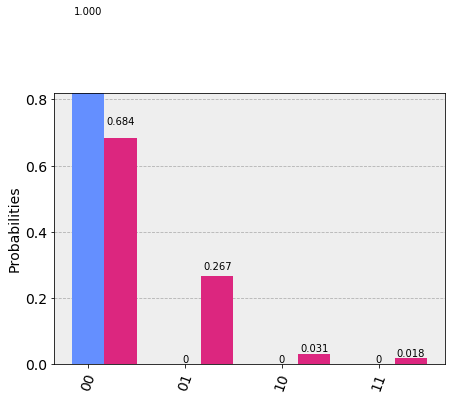

In [16]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

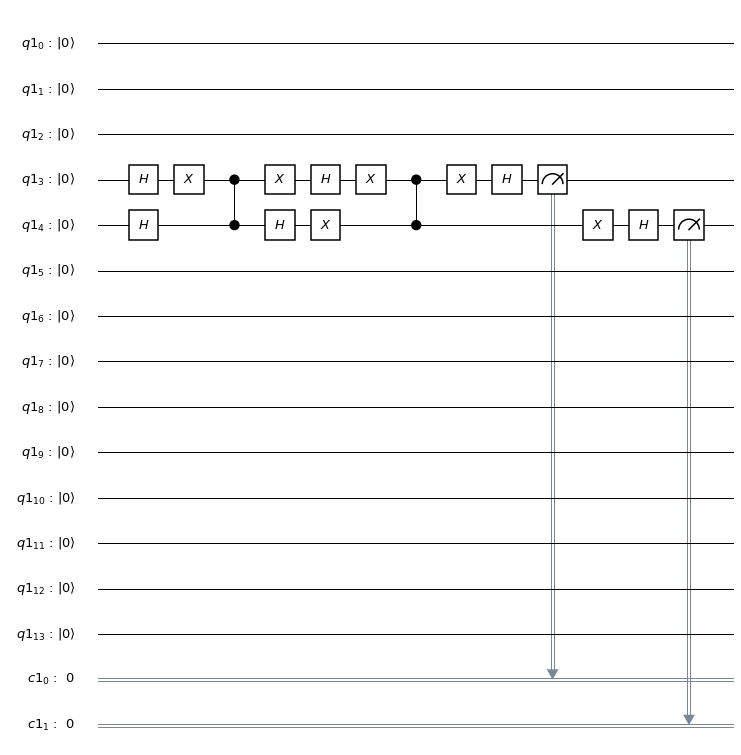

In [17]:
# N=2 Grover Search - Phase Oracle - Marked Item (01) - Qubits: 3, 4
qr = QuantumRegister(14)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[3])
qc.h(qr[4])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[3])
    qc.cz(qr[4],qr[3])
    qc.x(qr[3])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[3])
    qc.x(qr[4])
    qc.x(qr[3])

    qc.cz(qr[4],qr[3])
    
    qc.x(qr[4])
    qc.x(qr[3])
    qc.h(qr[4])
    qc.h(qr[3])

for j in range(1):        
    repeat()

qc.measure(qr[3],cr[0])
qc.measure(qr[4],cr[1])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

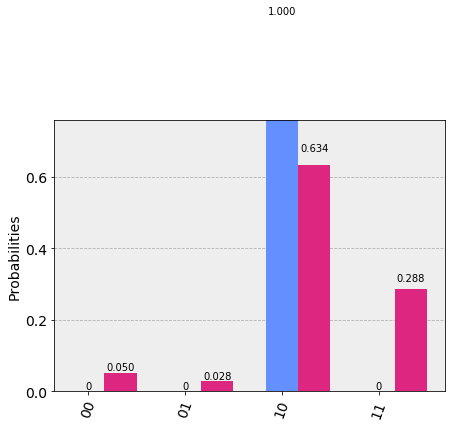

In [18]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

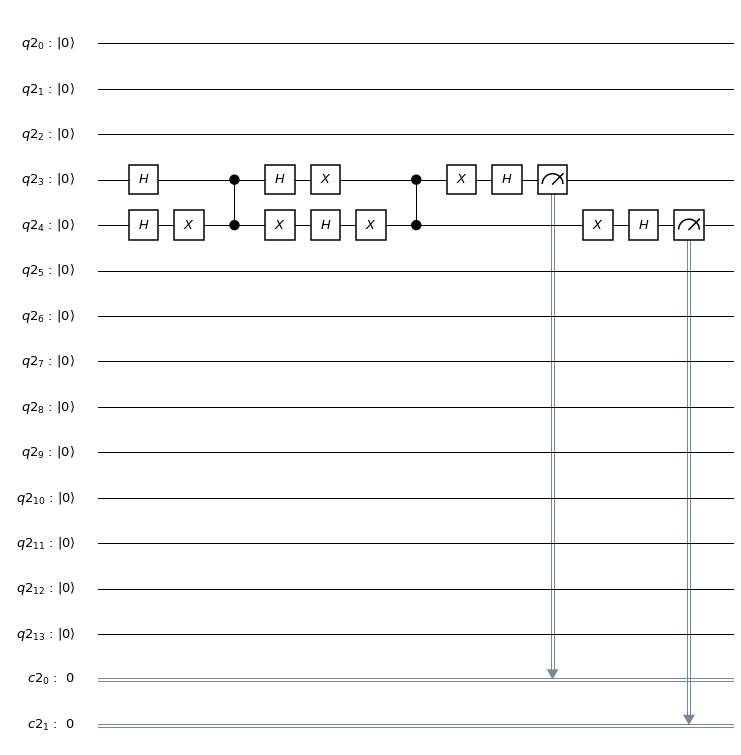

In [19]:
# N=2 Grover Search - Phase Oracle - Marked Item (10) - Qubits: 3, 4
qr = QuantumRegister(14)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[3])
qc.h(qr[4])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[4])
    qc.cz(qr[4],qr[3])
    qc.x(qr[4])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[3])
    qc.x(qr[4])
    qc.x(qr[3])

    qc.cz(qr[4],qr[3])
    
    qc.x(qr[4])
    qc.x(qr[3])
    qc.h(qr[4])
    qc.h(qr[3])

for j in range(1):        
    repeat()

qc.measure(qr[3],cr[0])
qc.measure(qr[4],cr[1])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

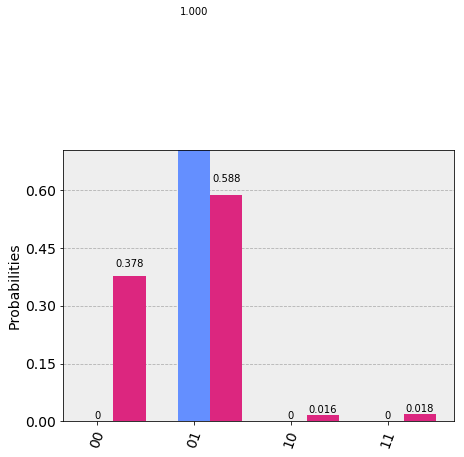

In [20]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

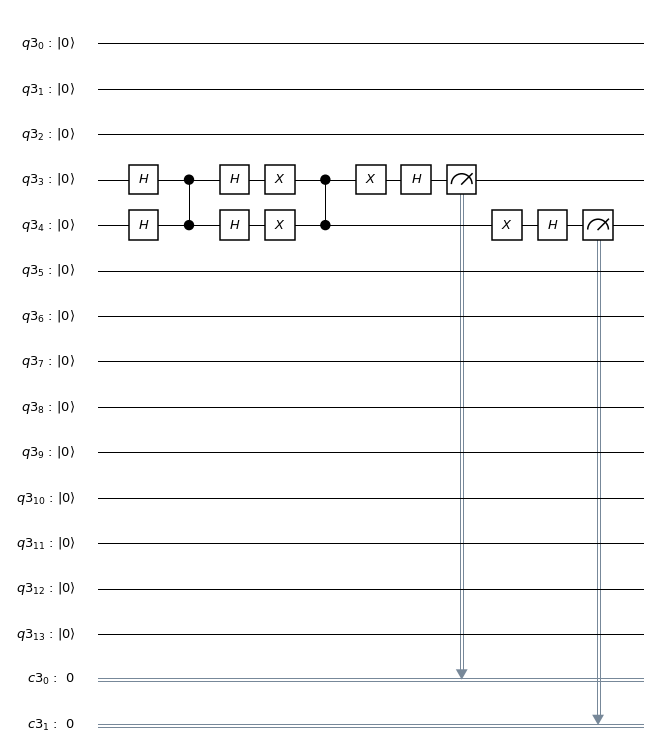

In [21]:
# N=2 Grover Search - Phase Oracle - Marked Item (11) - Qubits: 3, 4
qr = QuantumRegister(14)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[3])
qc.h(qr[4])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.cz(qr[4],qr[3])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[3])
    qc.x(qr[4])
    qc.x(qr[3])

    qc.cz(qr[4],qr[3])
    
    qc.x(qr[4])
    qc.x(qr[3])
    qc.h(qr[4])
    qc.h(qr[3])

for j in range(1):        
    repeat()

qc.measure(qr[3],cr[0])
qc.measure(qr[4],cr[1])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

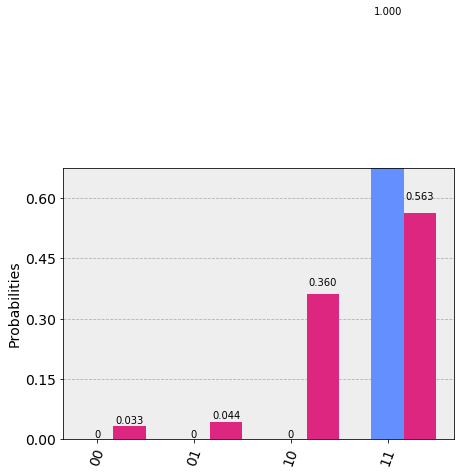

In [22]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

# N=2 Grover Search - Phase Oracle - Qubits: 4, 10

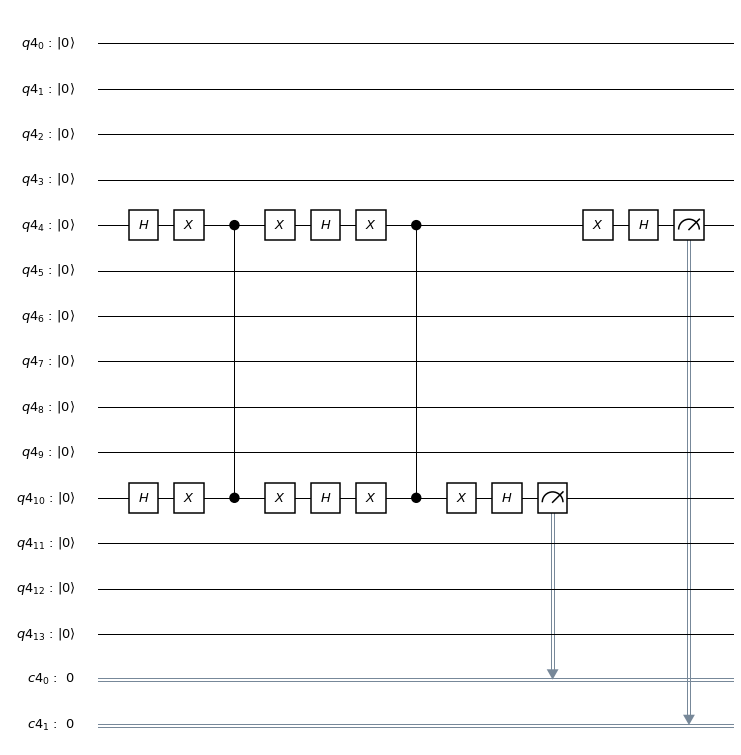

In [23]:
# N=2 Grover Search - Phase Oracle - Marked Item (00) - Qubits: 4, 10
qr = QuantumRegister(14)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[10])
qc.h(qr[4])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[10])
    qc.x(qr[4])
    qc.cz(qr[4],qr[10])
    qc.x(qr[10])
    qc.x(qr[4])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[10])
    qc.x(qr[4])
    qc.x(qr[10])

    qc.cz(qr[4],qr[10])
    
    qc.x(qr[4])
    qc.x(qr[10])
    qc.h(qr[4])
    qc.h(qr[10])

for j in range(1):        
    repeat()

qc.measure(qr[10],cr[0])
qc.measure(qr[4],cr[1])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

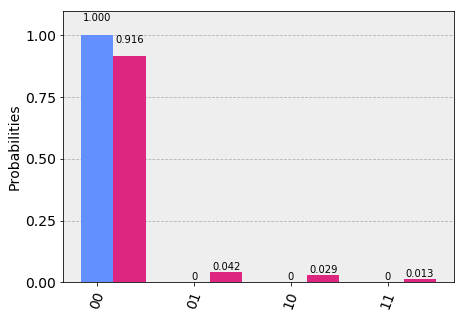

In [24]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

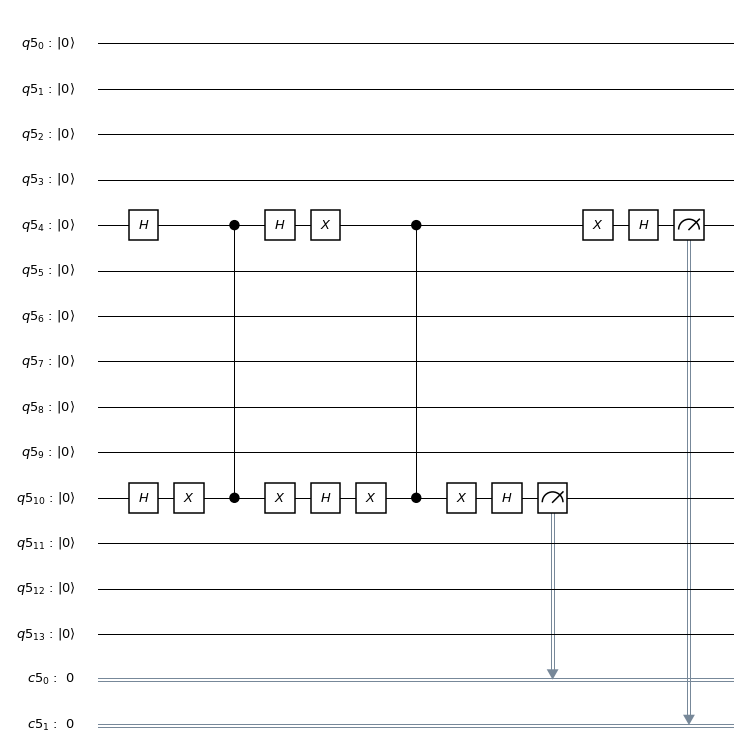

In [25]:
# N=2 Grover Search - Phase Oracle - Marked Item (01) - Qubits: 4, 10
qr = QuantumRegister(14)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[10])
qc.h(qr[4])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[10])
    qc.cz(qr[4],qr[10])
    qc.x(qr[10])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[10])
    qc.x(qr[4])
    qc.x(qr[10])

    qc.cz(qr[4],qr[10])
    
    qc.x(qr[4])
    qc.x(qr[10])
    qc.h(qr[4])
    qc.h(qr[10])

for j in range(1):        
    repeat()

qc.measure(qr[10],cr[0])
qc.measure(qr[4],cr[1])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

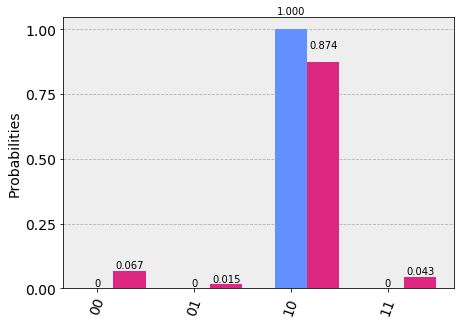

In [26]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

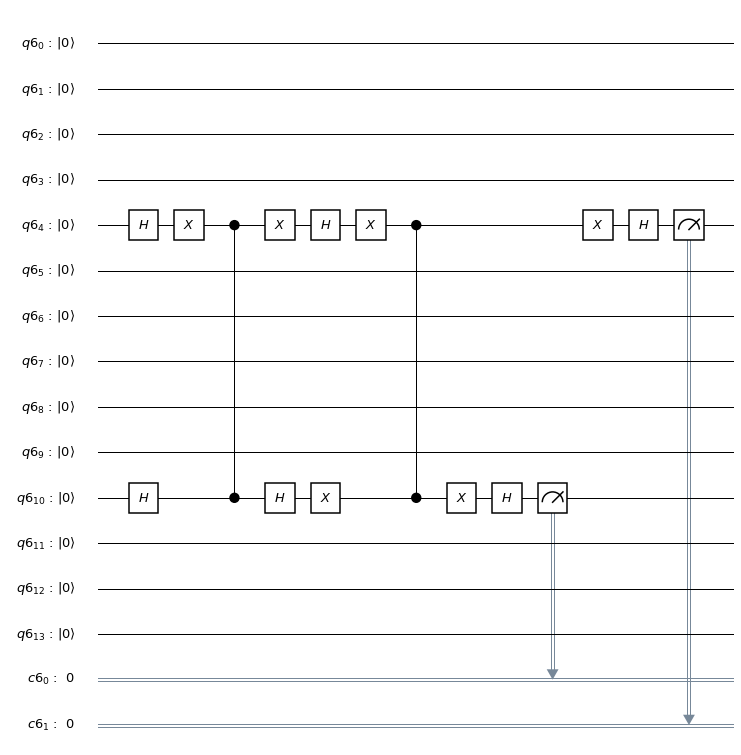

In [27]:
# N=2 Grover Search - Phase Oracle - Marked Item (10) - Qubits: 4, 10
qr = QuantumRegister(14)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[10])
qc.h(qr[4])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[4])
    qc.cz(qr[4],qr[10])
    qc.x(qr[4])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[10])
    qc.x(qr[4])
    qc.x(qr[10])

    qc.cz(qr[4],qr[10])
    
    qc.x(qr[4])
    qc.x(qr[10])
    qc.h(qr[4])
    qc.h(qr[10])

for j in range(1):        
    repeat()

qc.measure(qr[10],cr[0])
qc.measure(qr[4],cr[1])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

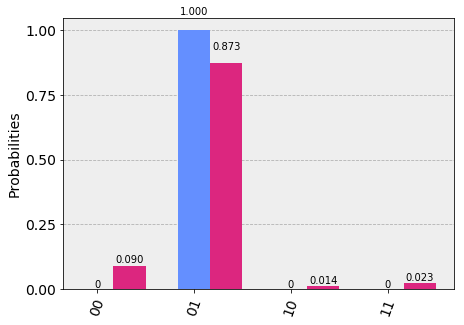

In [28]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

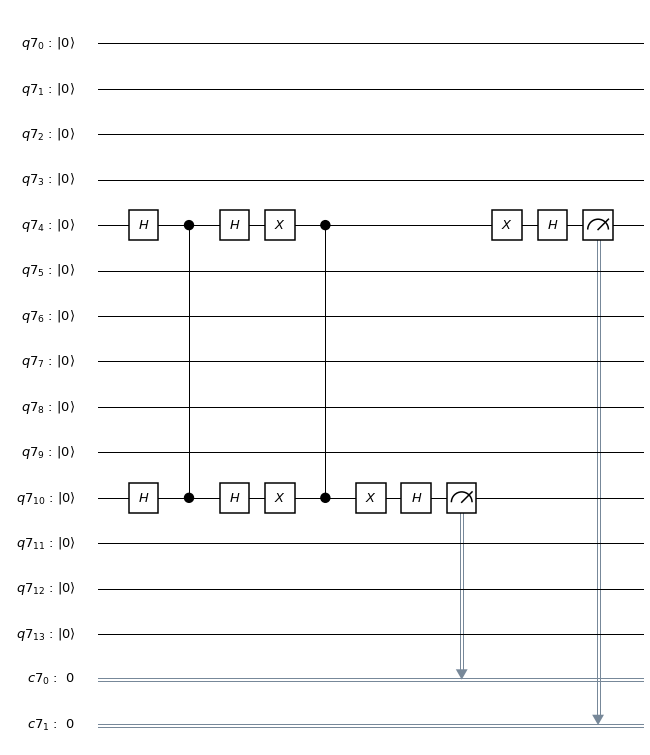

In [29]:
# N=2 Grover Search - Phase Oracle - Marked Item (11) - Qubits: 4, 10
qr = QuantumRegister(14)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[10])
qc.h(qr[4])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.cz(qr[4],qr[10])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[10])
    qc.x(qr[4])
    qc.x(qr[10])

    qc.cz(qr[4],qr[10])
    
    qc.x(qr[4])
    qc.x(qr[10])
    qc.h(qr[4])
    qc.h(qr[10])

for j in range(1):        
    repeat()

qc.measure(qr[10],cr[0])
qc.measure(qr[4],cr[1])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

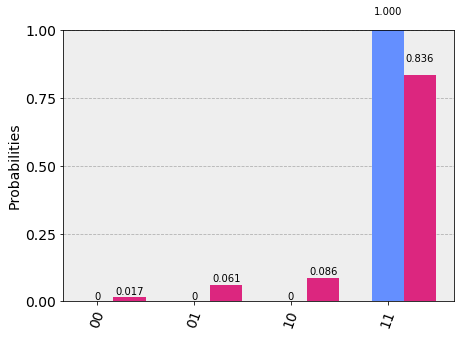

In [30]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

# N=3 Grover Search - Phase Oracle - Qubits: 4, 10, 11 - Iterations: 1

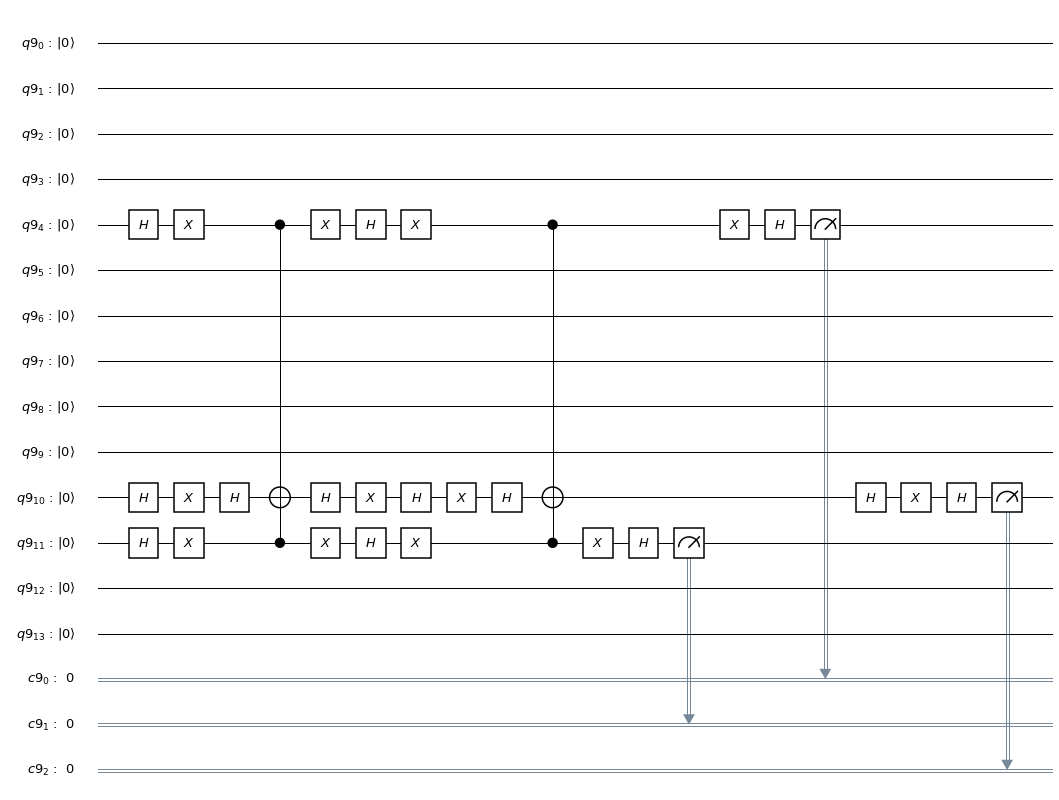

In [33]:
# N=3 Grover Search - Phase Oracle - Marked Item (000) - Qubits: 4, 10, 11 - Iterations: 1
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[4])
qc.h(qr[11])
qc.h(qr[10])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

for j in range(1):        
    repeat()


qc.measure(qr[4],cr[0])
qc.measure(qr[11],cr[1])
qc.measure(qr[10],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

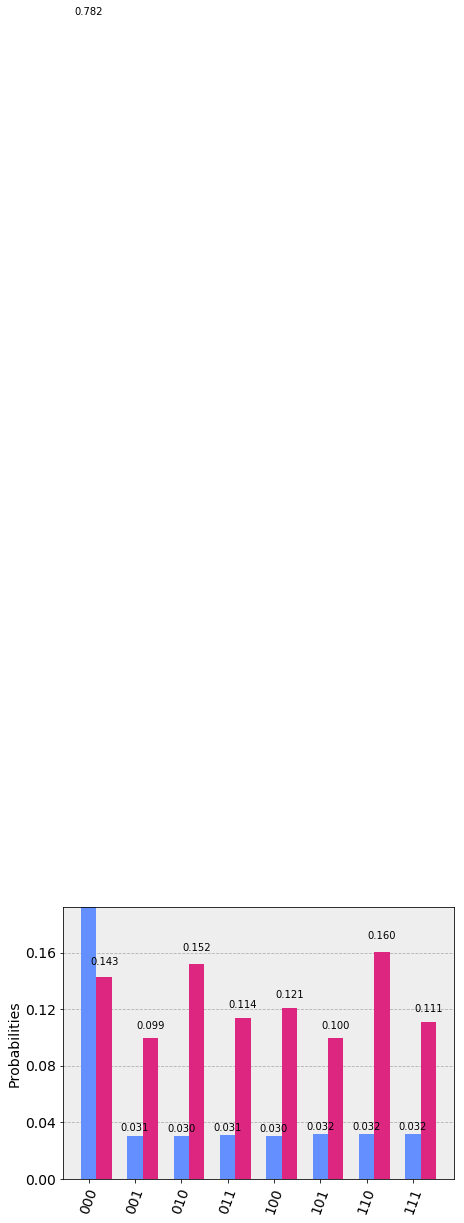

In [34]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

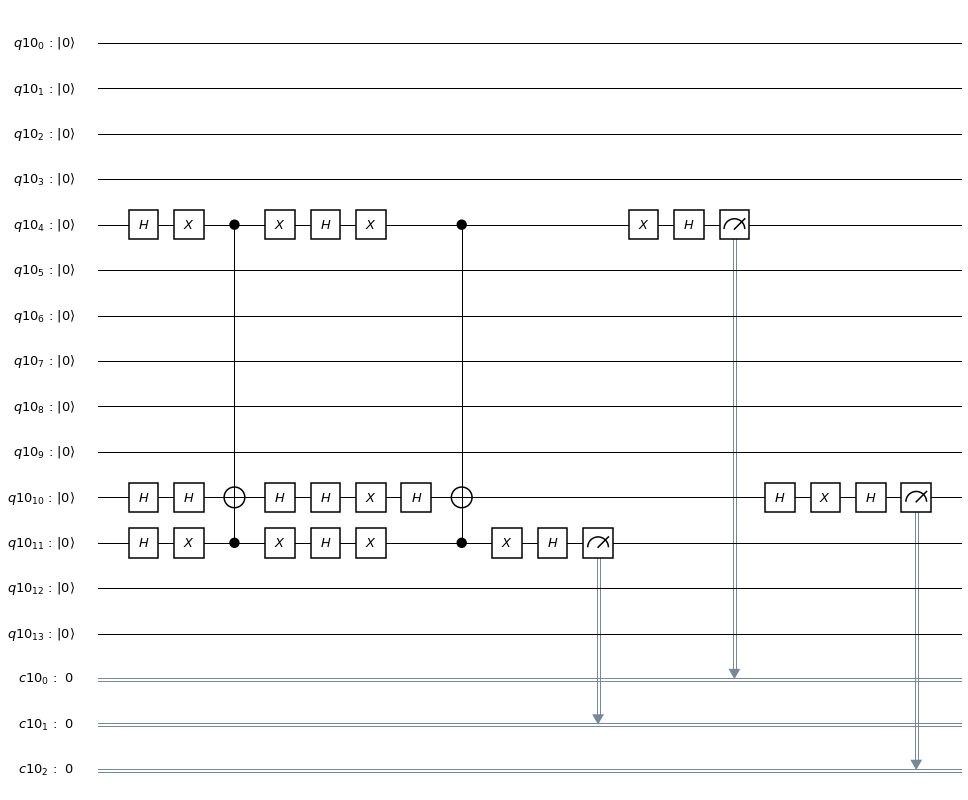

In [35]:
# N=3 Grover Search - Phase Oracle - Marked Item (001) - Qubits: 4, 10, 11 - Iterations: 1
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[4])
qc.h(qr[11])
qc.h(qr[10])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[4])
    qc.x(qr[11])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[4])
    qc.x(qr[11])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

for j in range(1):        
    repeat()


qc.measure(qr[4],cr[0])
qc.measure(qr[11],cr[1])
qc.measure(qr[10],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

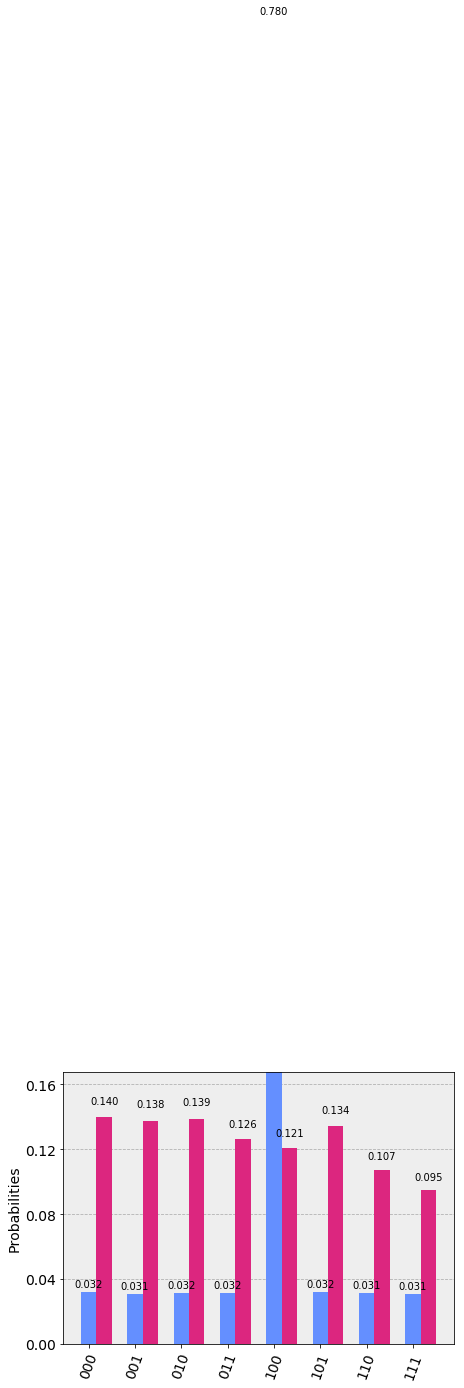

In [36]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

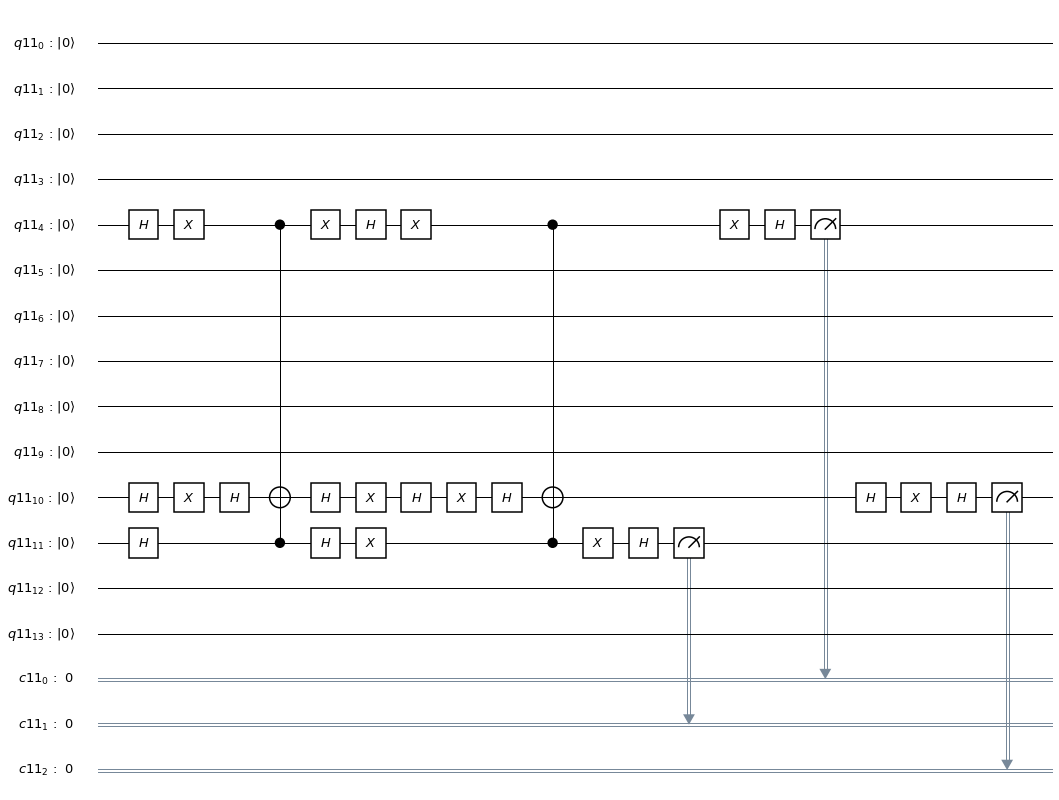

In [37]:
# N=3 Grover Search - Phase Oracle - Marked Item (010) - Qubits: 4, 10, 11 - Iterations: 1
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[4])
qc.h(qr[11])
qc.h(qr[10])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[4])
    qc.x(qr[10])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[4])
    qc.x(qr[10])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

for j in range(1):        
    repeat()


qc.measure(qr[4],cr[0])
qc.measure(qr[11],cr[1])
qc.measure(qr[10],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

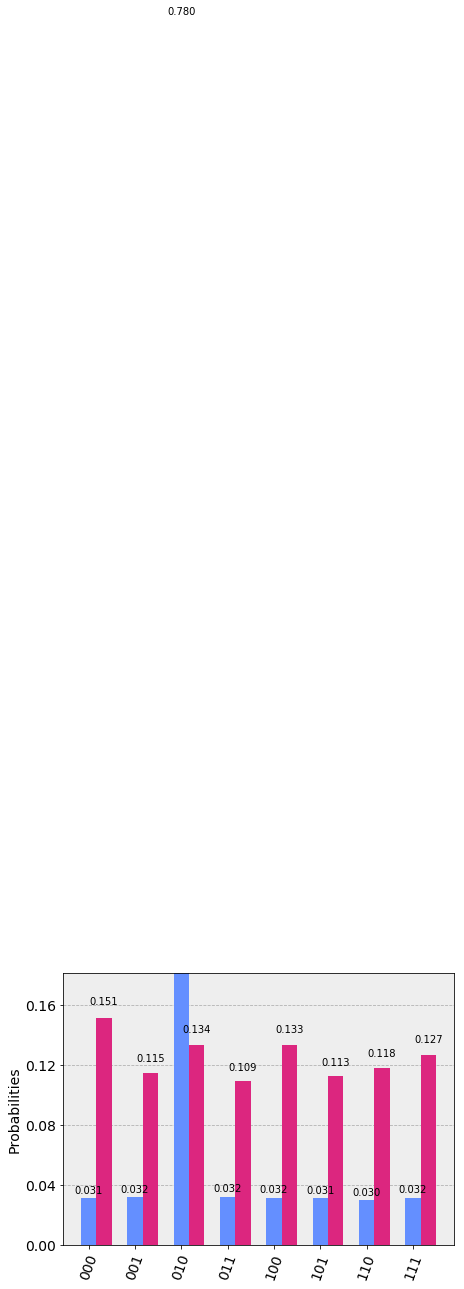

In [38]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

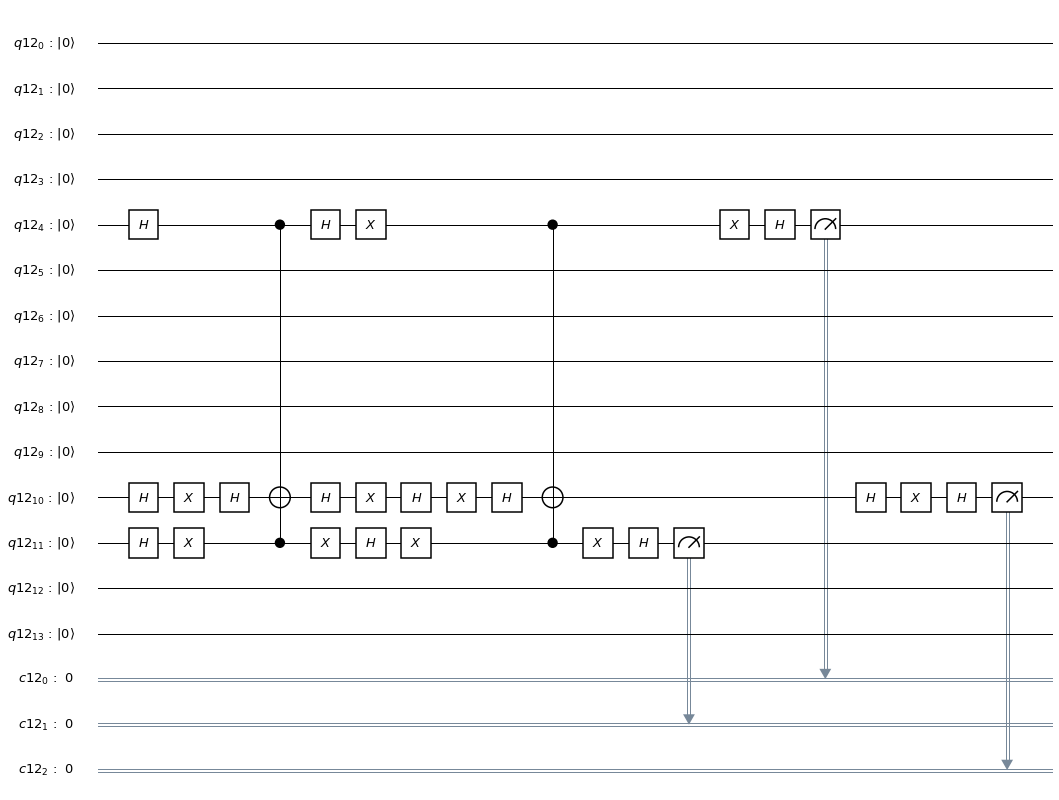

In [39]:
# N=3 Grover Search - Phase Oracle - Marked Item (100) - Qubits: 4, 10, 11 - Iterations: 1
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[4])
qc.h(qr[11])
qc.h(qr[10])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[11])
    qc.x(qr[10])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[11])
    qc.x(qr[10])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

for j in range(1):        
    repeat()


qc.measure(qr[4],cr[0])
qc.measure(qr[11],cr[1])
qc.measure(qr[10],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

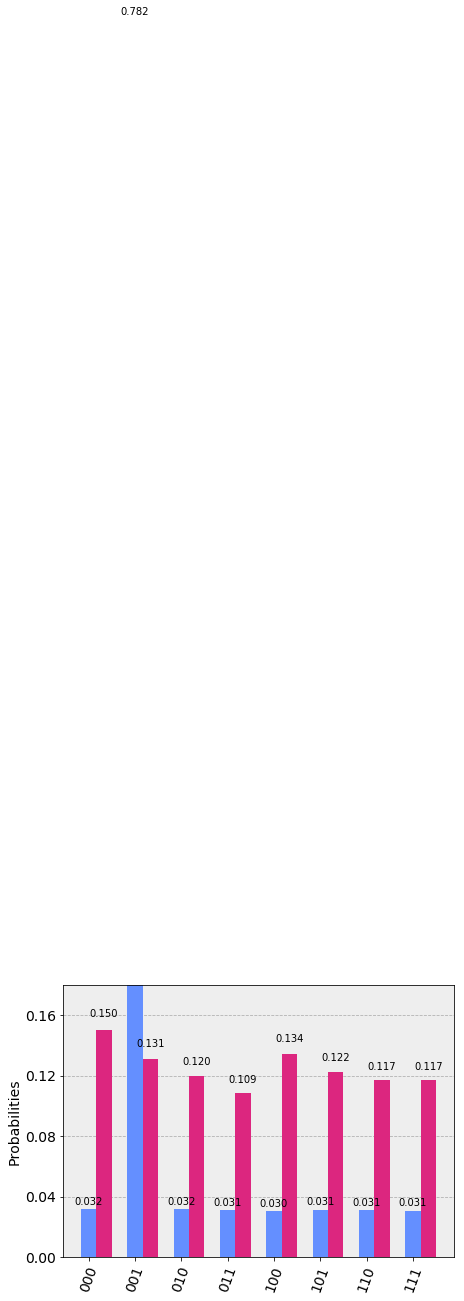

In [40]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

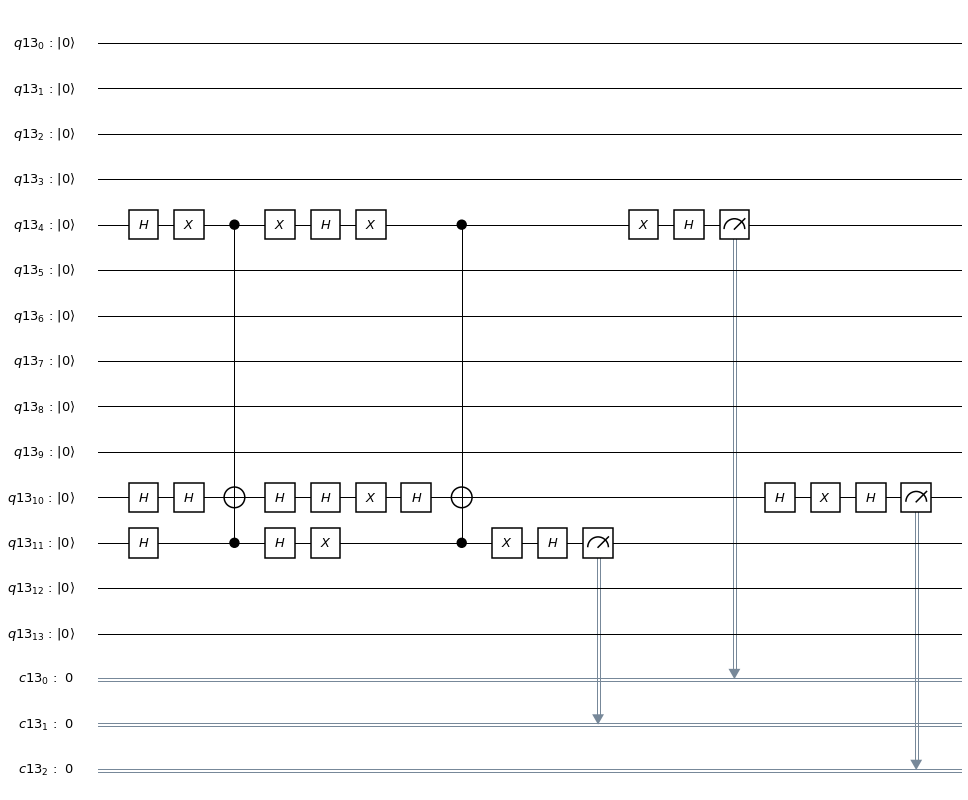

In [41]:
# N=3 Grover Search - Phase Oracle - Marked Item (011) - Qubits: 4, 10, 11 - Iterations: 1
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[4])
qc.h(qr[11])
qc.h(qr[10])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[4])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[4])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

for j in range(1):        
    repeat()


qc.measure(qr[4],cr[0])
qc.measure(qr[11],cr[1])
qc.measure(qr[10],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

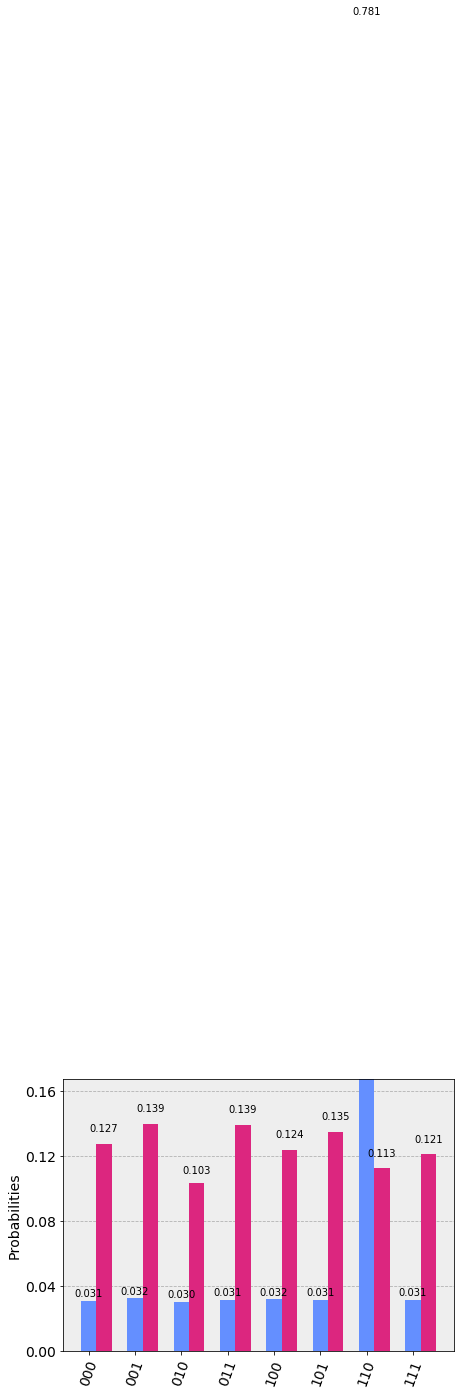

In [42]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

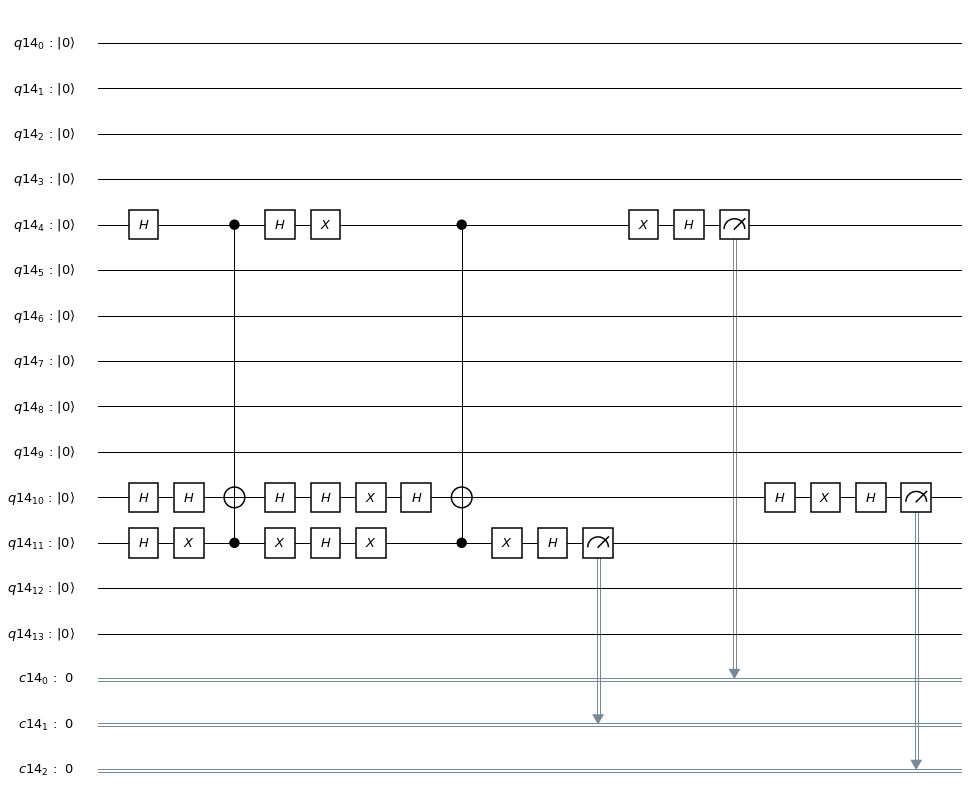

In [43]:
# N=3 Grover Search - Phase Oracle - Marked Item (101) - Qubits: 4, 10, 11 - Iterations: 1
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[4])
qc.h(qr[11])
qc.h(qr[10])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[11])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[11])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

for j in range(1):        
    repeat()


qc.measure(qr[4],cr[0])
qc.measure(qr[11],cr[1])
qc.measure(qr[10],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

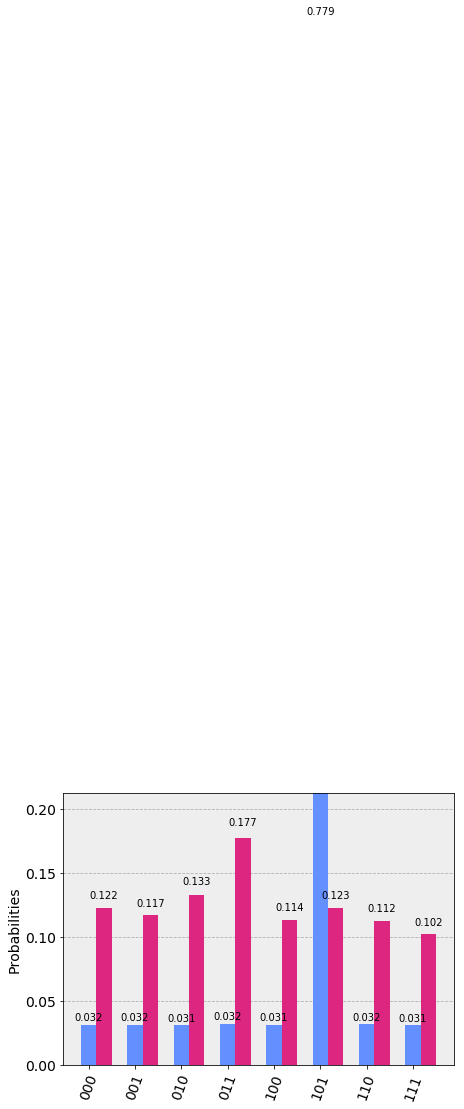

In [44]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

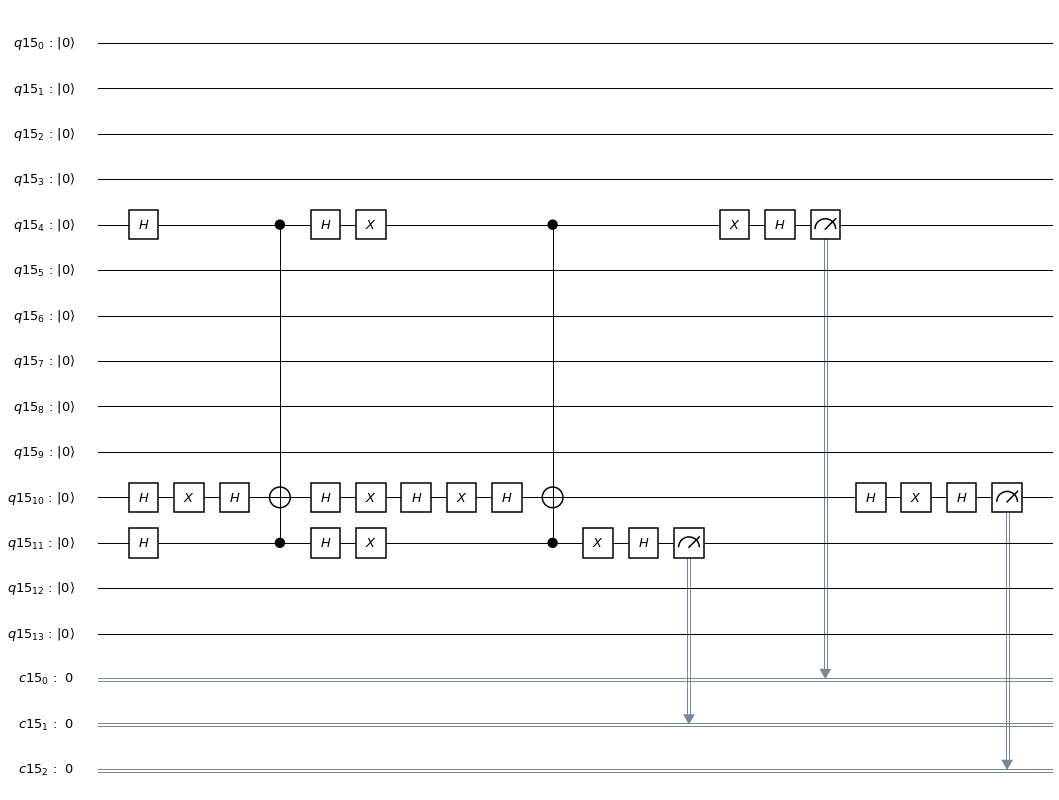

In [45]:
# N=3 Grover Search - Phase Oracle - Marked Item (110) - Qubits: 4, 10, 11 - Iterations: 1
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[4])
qc.h(qr[11])
qc.h(qr[10])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[10])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[10])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

for j in range(1):        
    repeat()


qc.measure(qr[4],cr[0])
qc.measure(qr[11],cr[1])
qc.measure(qr[10],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

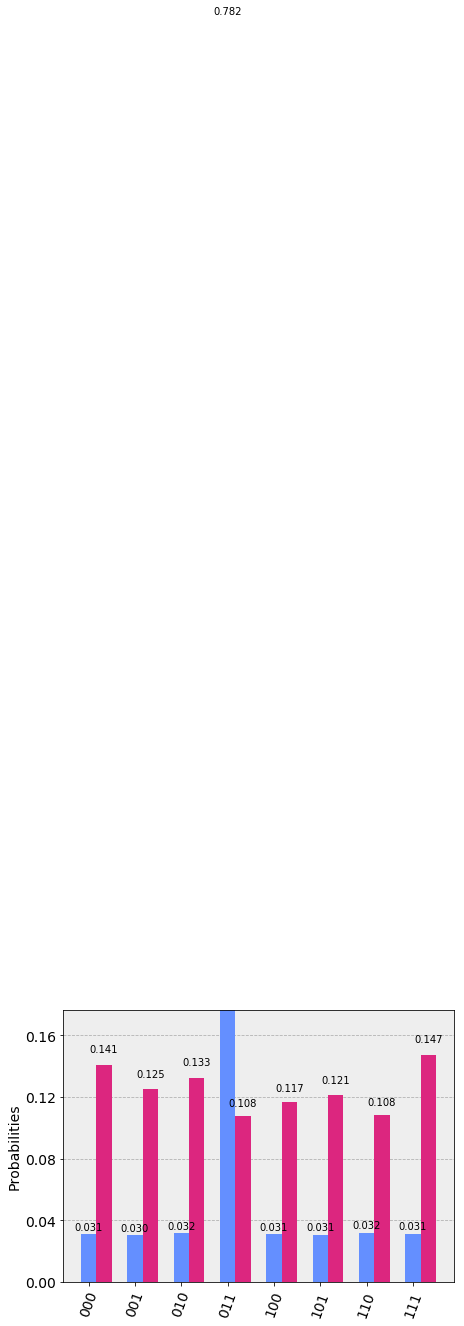

In [46]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

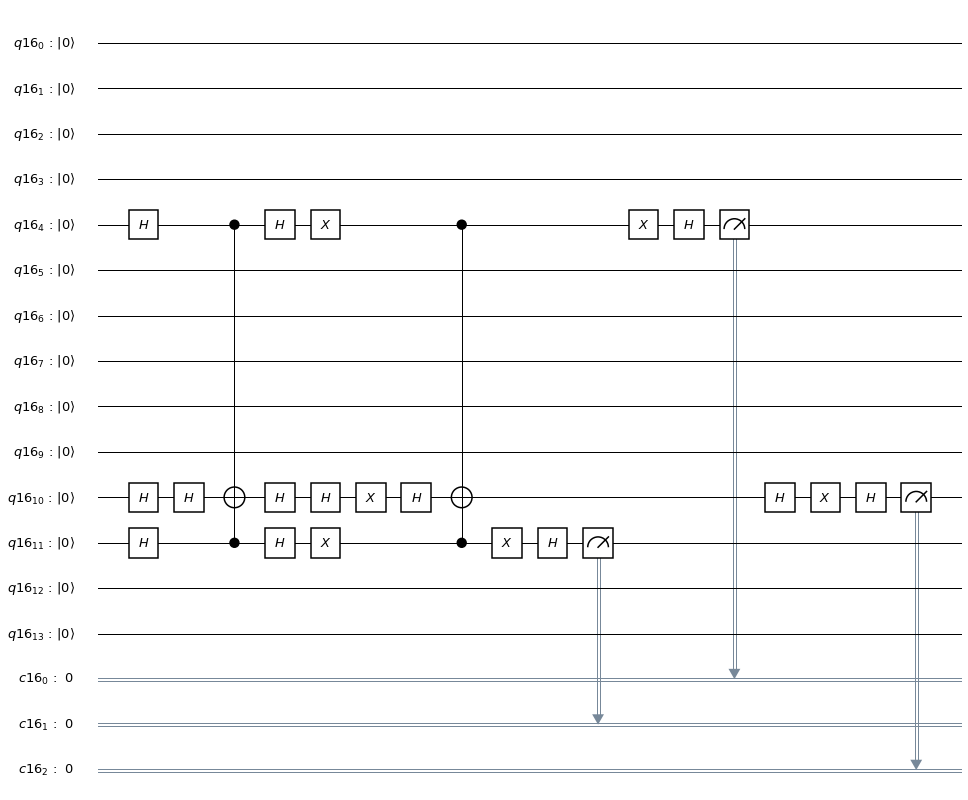

In [47]:
# N=3 Grover Search - Phase Oracle - Marked Item (111) - Qubits: 4, 10, 11 - Iterations: 1
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[4])
qc.h(qr[11])
qc.h(qr[10])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])

    # Amplification
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

for j in range(1):        
    repeat()


qc.measure(qr[4],cr[0])
qc.measure(qr[11],cr[1])
qc.measure(qr[10],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

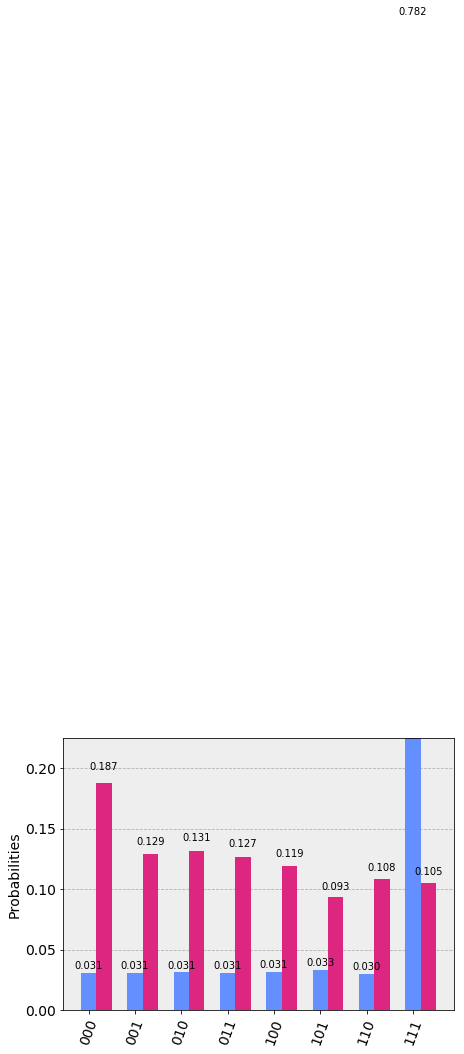

In [48]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

# N=3 Grover Search - Phase Oracle - Qubits: 6, 7, 8 - Iterations: 1

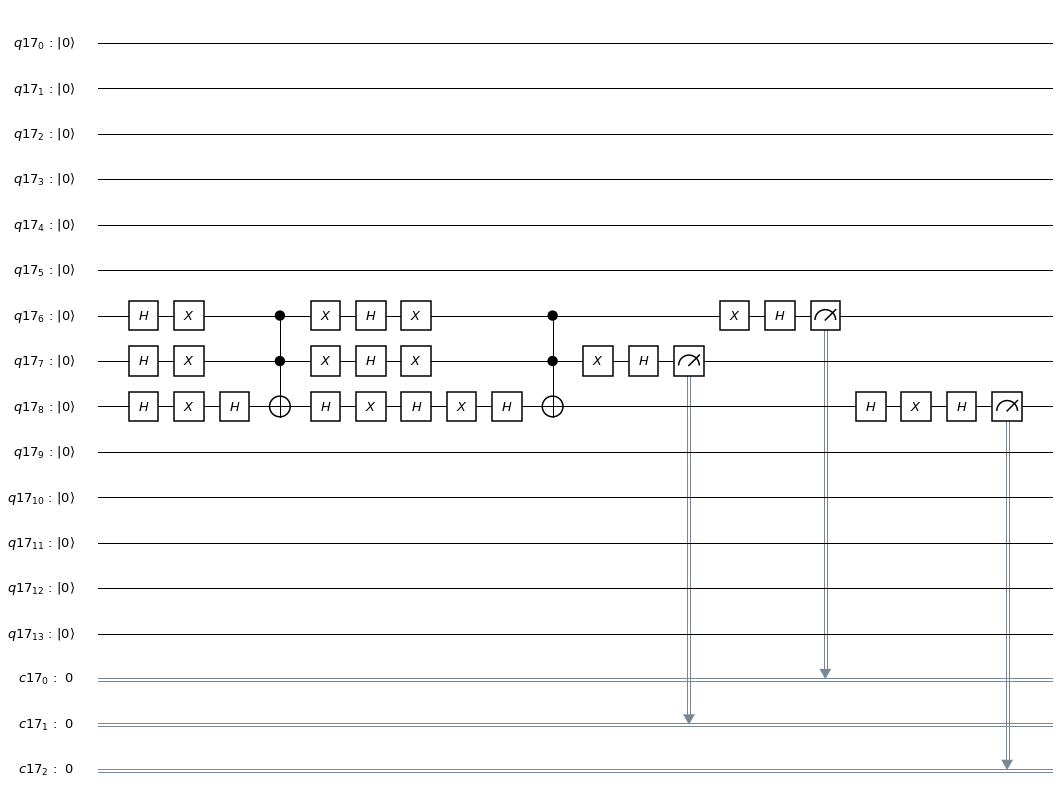

In [49]:
# N=3 Grover Search - Phase Oracle - Marked Item (000) - Qubits: 6, 7, 8 - Iterations: 1
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[6])
qc.h(qr[7])
qc.h(qr[8])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    # Amplification
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

for j in range(1):        
    repeat()


qc.measure(qr[6],cr[0])
qc.measure(qr[7],cr[1])
qc.measure(qr[8],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

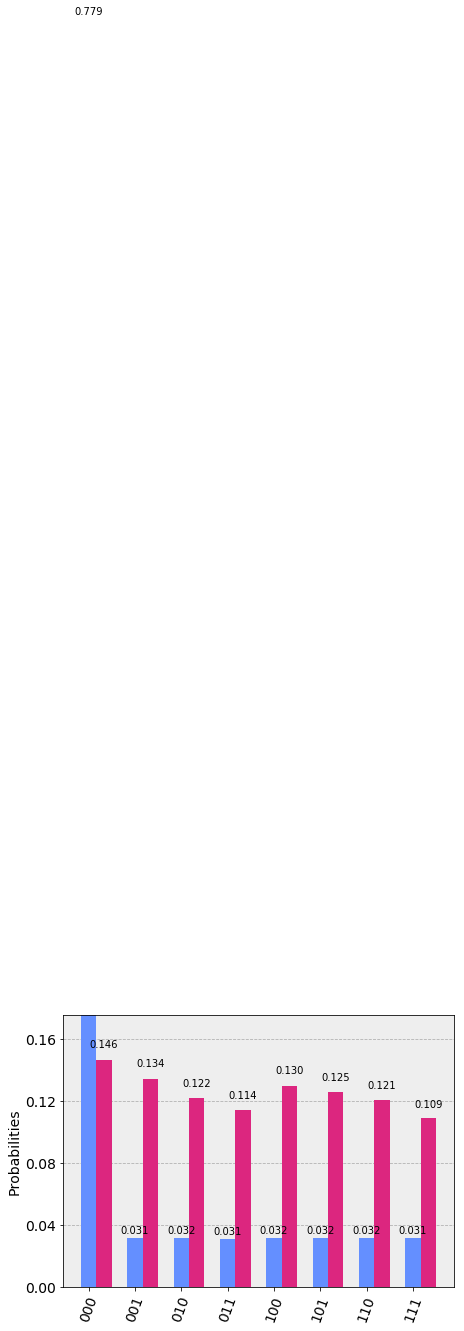

In [50]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

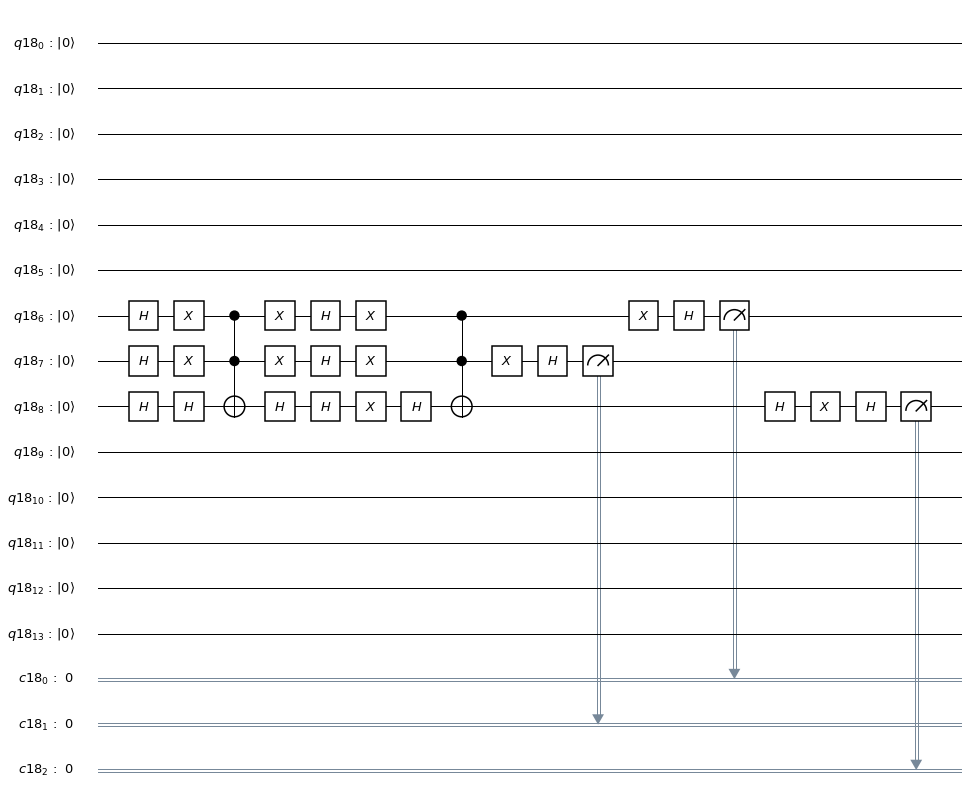

In [51]:
# N=3 Grover Search - Phase Oracle - Marked Item (001) - Qubits: 6, 7, 8 - Iterations: 1
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[6])
qc.h(qr[7])
qc.h(qr[8])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[6])
    qc.x(qr[7])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[6])
    qc.x(qr[7])
    
    # Amplification
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

for j in range(1):        
    repeat()


qc.measure(qr[6],cr[0])
qc.measure(qr[7],cr[1])
qc.measure(qr[8],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

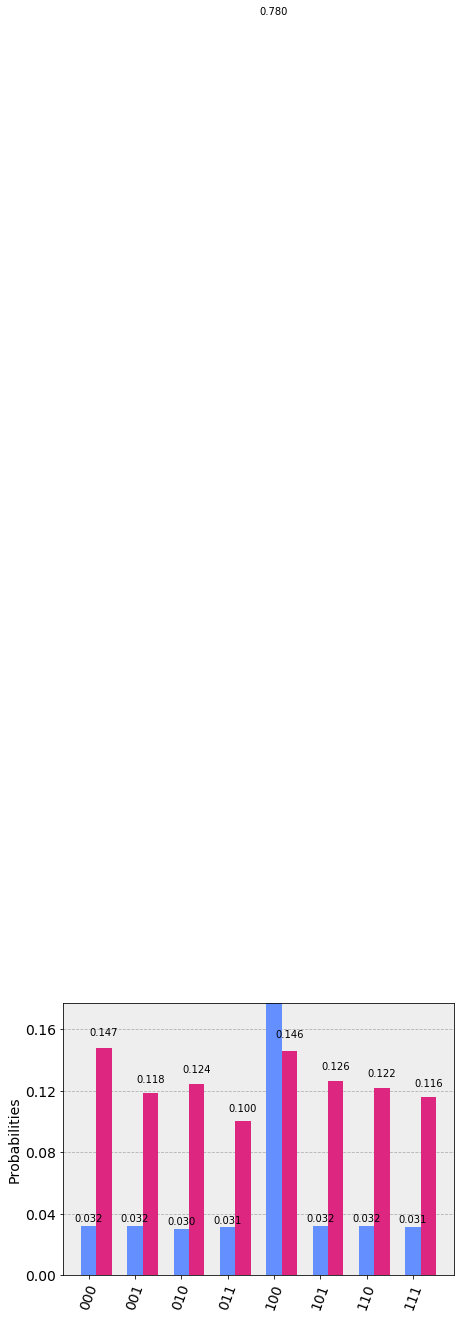

In [52]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

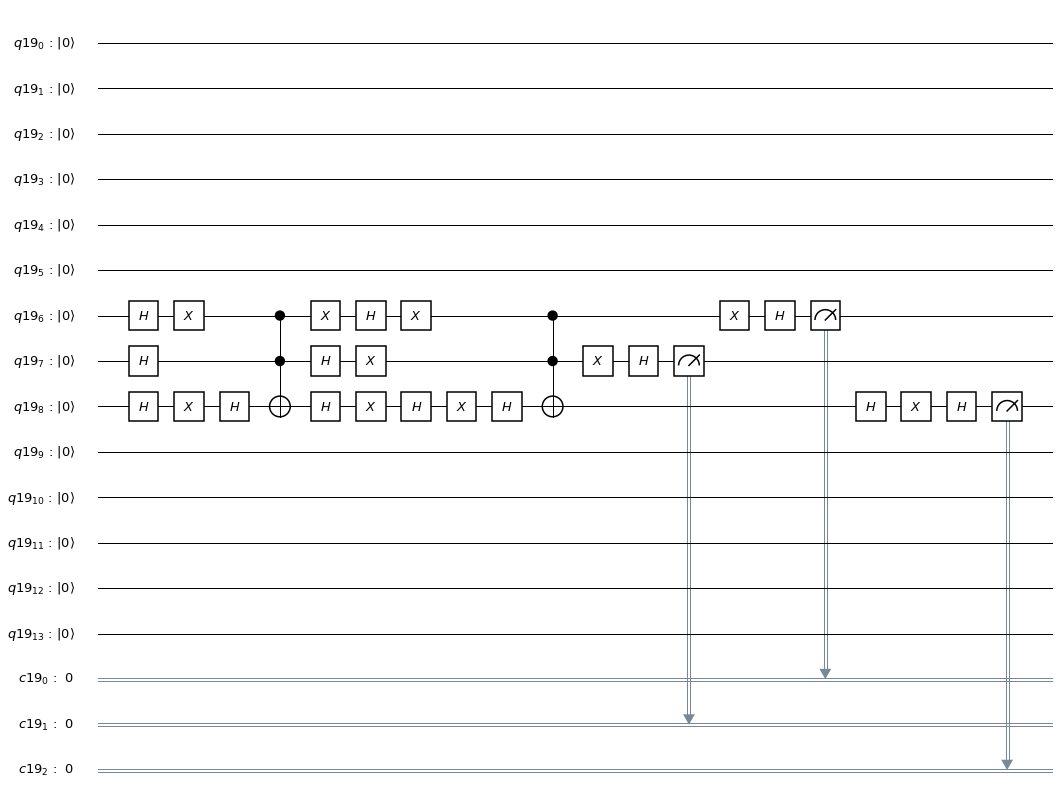

In [53]:
# N=3 Grover Search - Phase Oracle - Marked Item (010) - Qubits: 6, 7, 8 - Iterations: 1
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[6])
qc.h(qr[7])
qc.h(qr[8])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[6])
    qc.x(qr[8])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[6])
    qc.x(qr[8])
    
    # Amplification
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

for j in range(1):        
    repeat()


qc.measure(qr[6],cr[0])
qc.measure(qr[7],cr[1])
qc.measure(qr[8],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

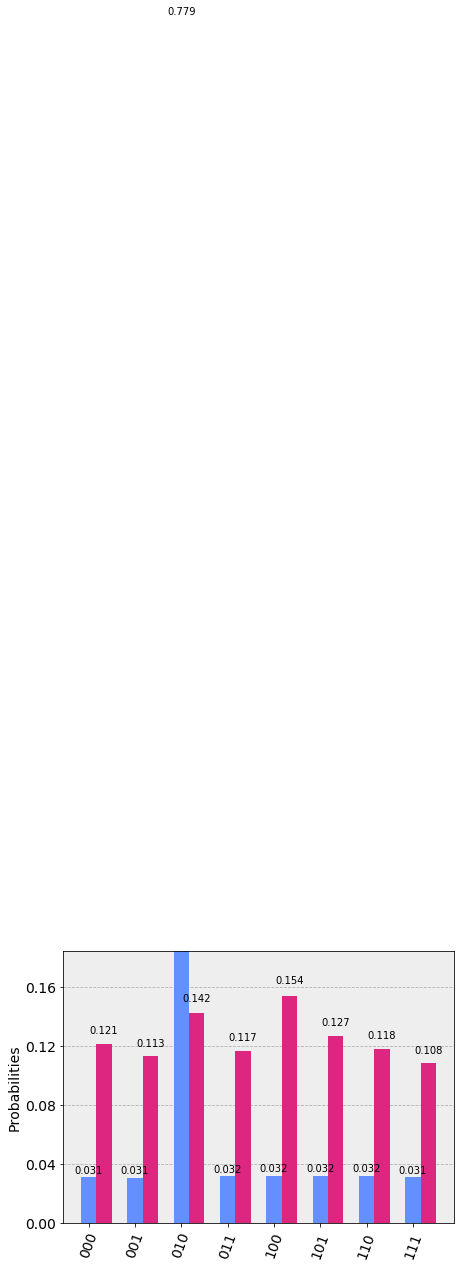

In [54]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

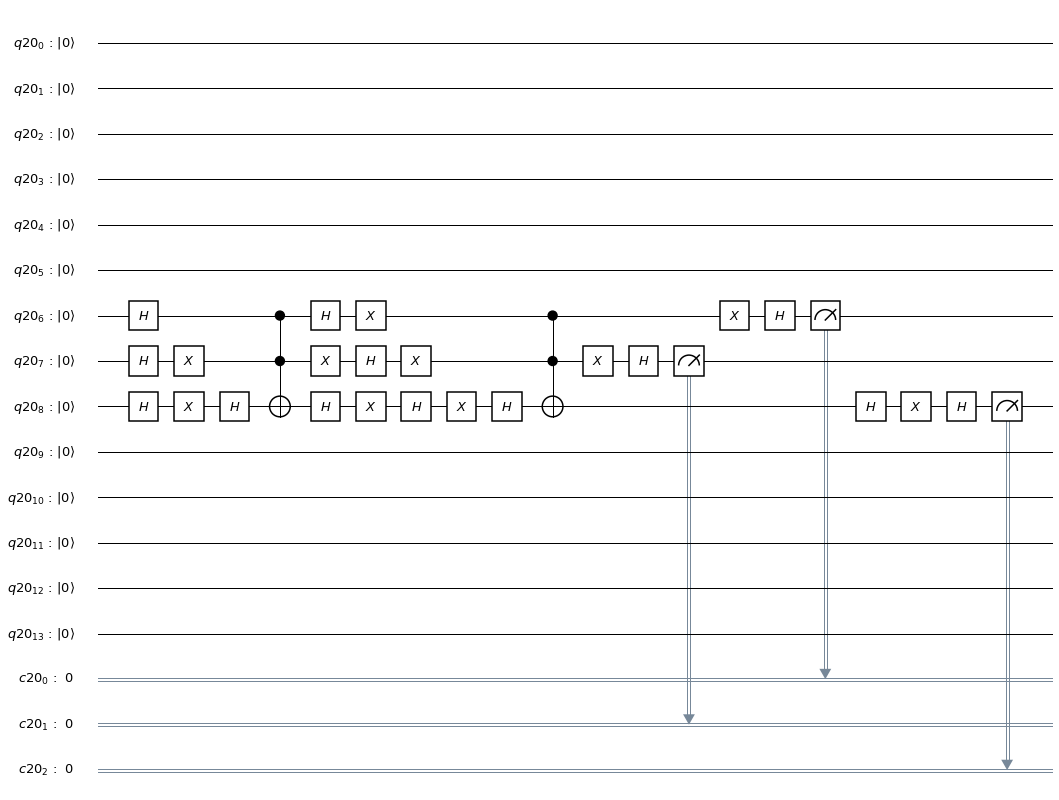

In [55]:
# N=3 Grover Search - Phase Oracle - Marked Item (100) - Qubits: 6, 7, 8 - Iterations: 1
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[6])
qc.h(qr[7])
qc.h(qr[8])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[7])
    qc.x(qr[8])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[7])
    qc.x(qr[8])
    
    # Amplification
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

for j in range(1):        
    repeat()


qc.measure(qr[6],cr[0])
qc.measure(qr[7],cr[1])
qc.measure(qr[8],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

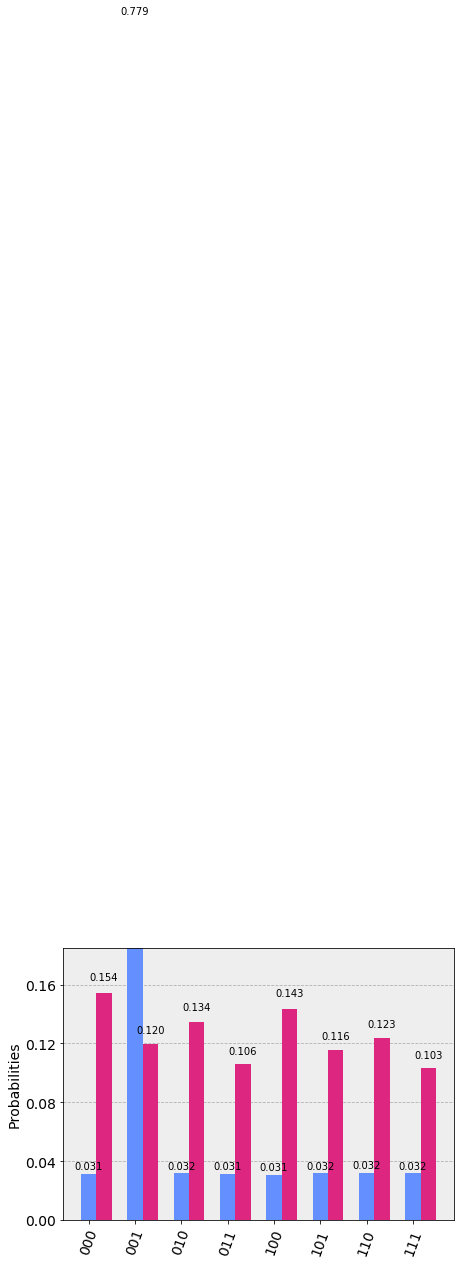

In [56]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

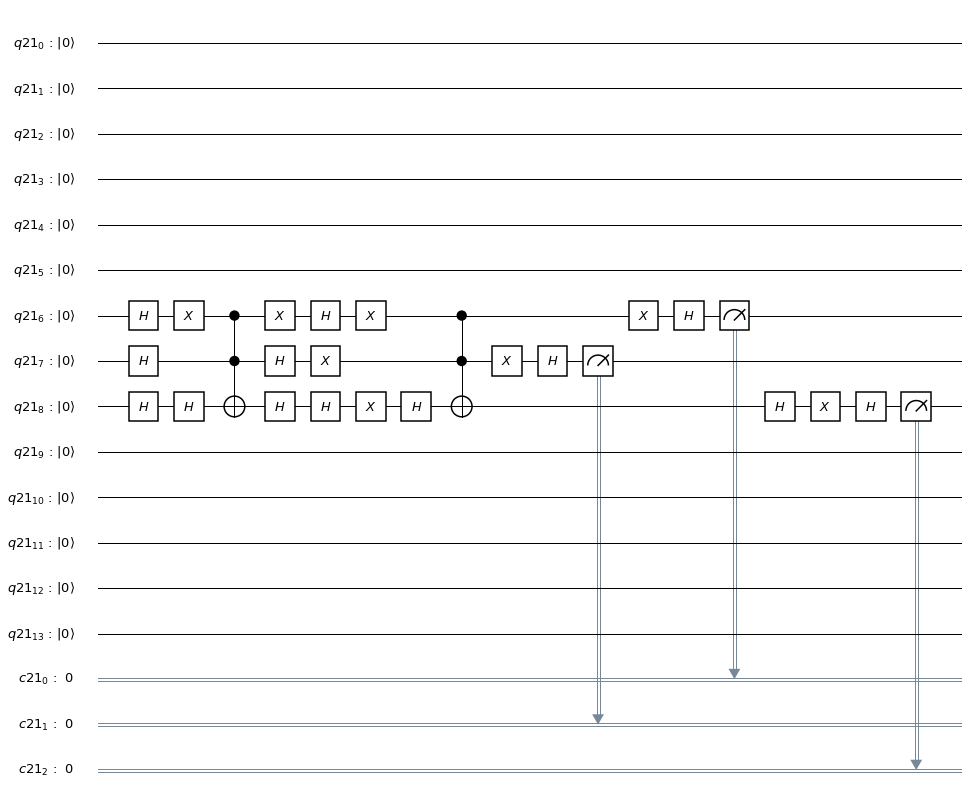

In [57]:
# N=3 Grover Search - Phase Oracle - Marked Item (011) - Qubits: 6, 7, 8 - Iterations: 1
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[6])
qc.h(qr[7])
qc.h(qr[8])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[6])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[6])
    
    # Amplification
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

for j in range(1):        
    repeat()


qc.measure(qr[6],cr[0])
qc.measure(qr[7],cr[1])
qc.measure(qr[8],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

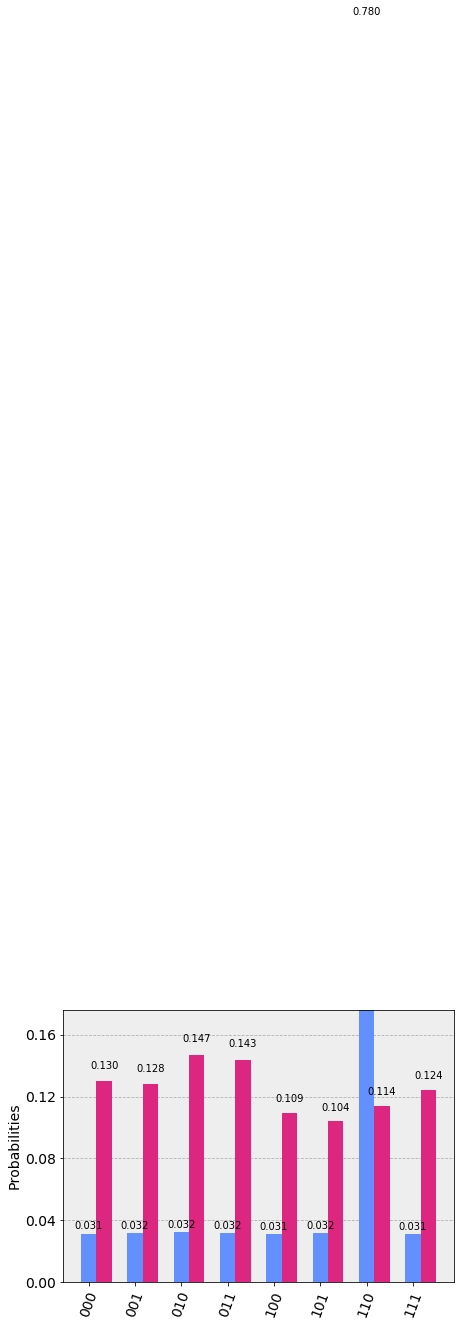

In [58]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

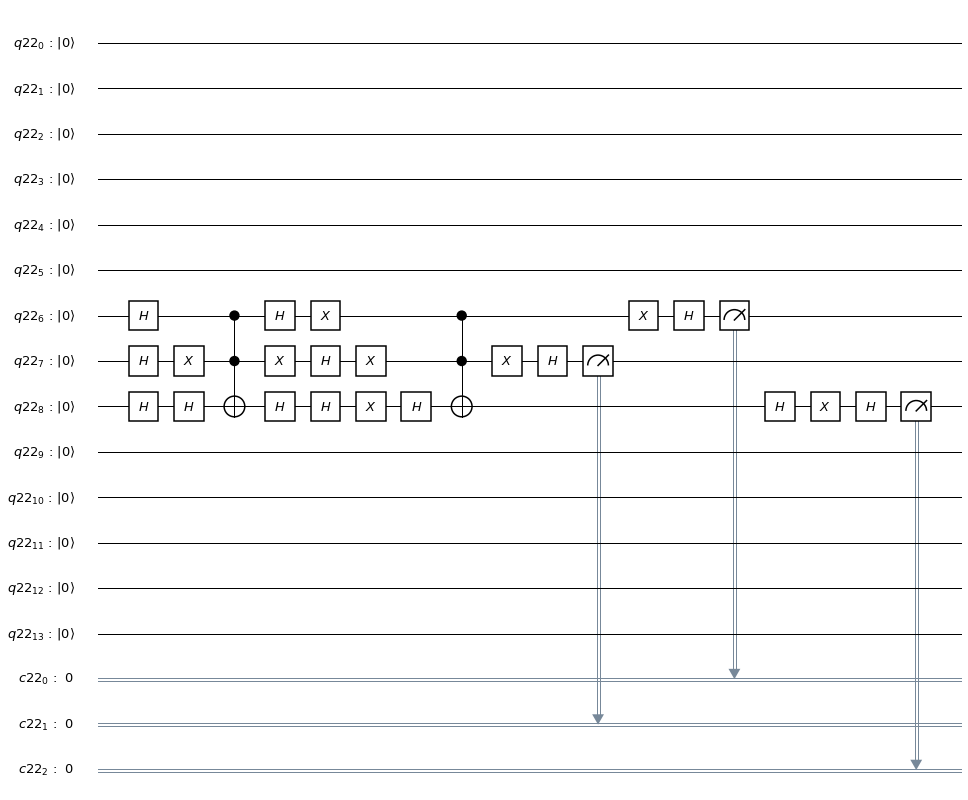

In [59]:
# N=3 Grover Search - Phase Oracle - Marked Item (101) - Qubits: 6, 7, 8 - Iterations: 1
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[6])
qc.h(qr[7])
qc.h(qr[8])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[7])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[7])
    
    # Amplification
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

for j in range(1):        
    repeat()


qc.measure(qr[6],cr[0])
qc.measure(qr[7],cr[1])
qc.measure(qr[8],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

Got a 502 code response to /api/Jobs/5c720d2651beaa005f6ad7f2/status: 502 Bad Gateway: Registered endpoint failed to handle the request.



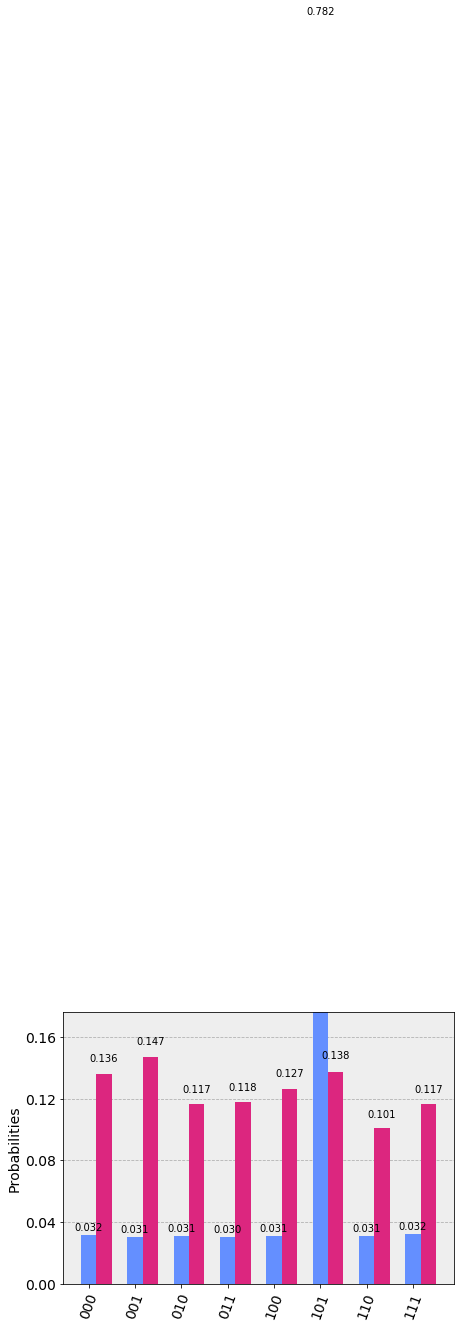

In [60]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

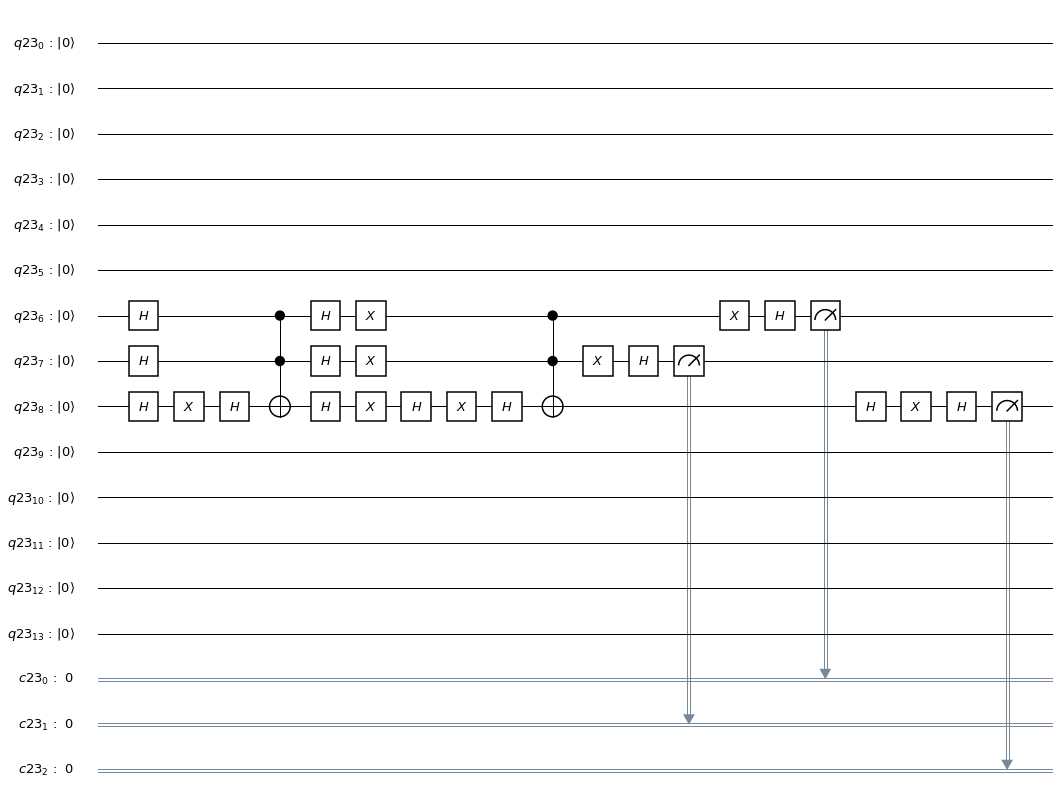

In [61]:
# N=3 Grover Search - Phase Oracle - Marked Item (110) - Qubits: 6, 7, 8 - Iterations: 1
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[6])
qc.h(qr[7])
qc.h(qr[8])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[8])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[8])
    
    # Amplification
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

for j in range(1):        
    repeat()


qc.measure(qr[6],cr[0])
qc.measure(qr[7],cr[1])
qc.measure(qr[8],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

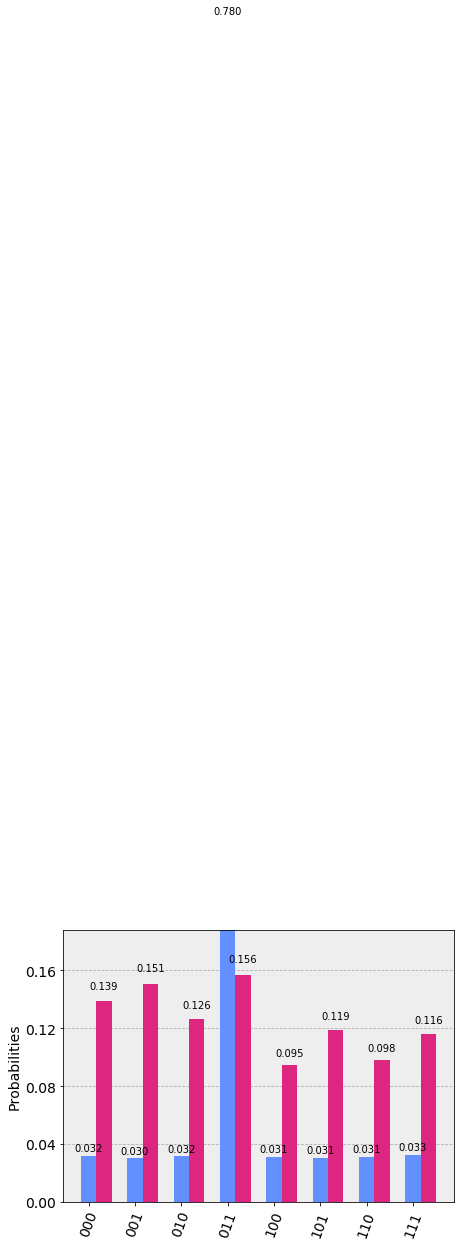

In [62]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

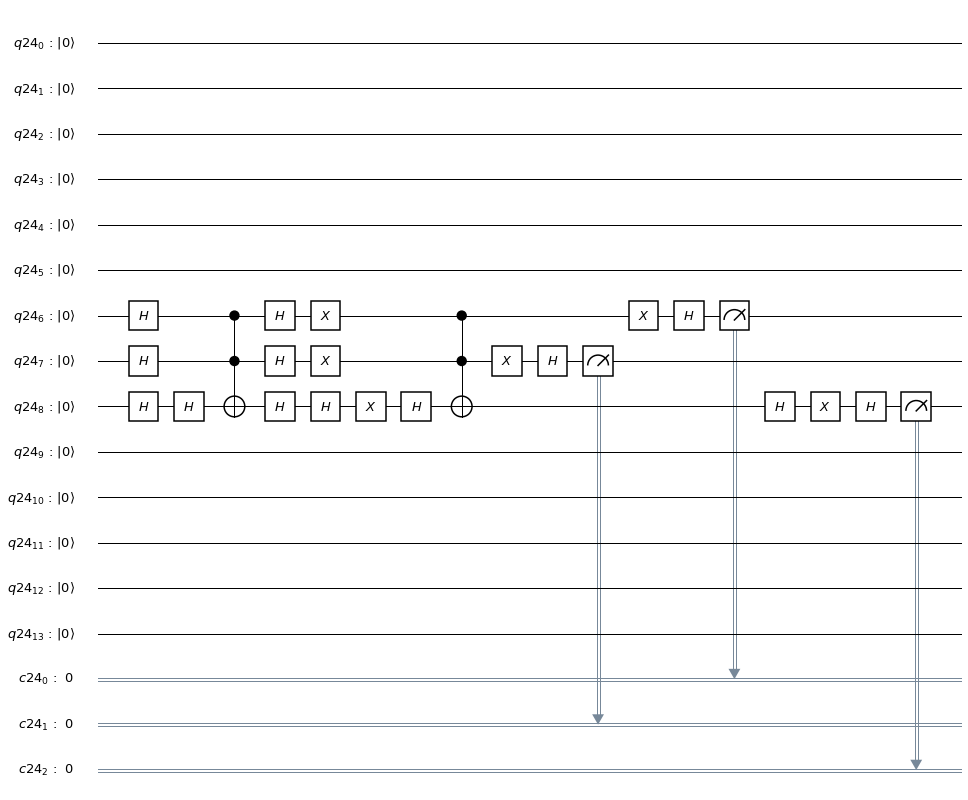

In [63]:
# N=3 Grover Search - Phase Oracle - Marked Item (111) - Qubits: 6, 7, 8 - Iterations: 1
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[6])
qc.h(qr[7])
qc.h(qr[8])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    
    # Amplification
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

for j in range(1):        
    repeat()


qc.measure(qr[6],cr[0])
qc.measure(qr[7],cr[1])
qc.measure(qr[8],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

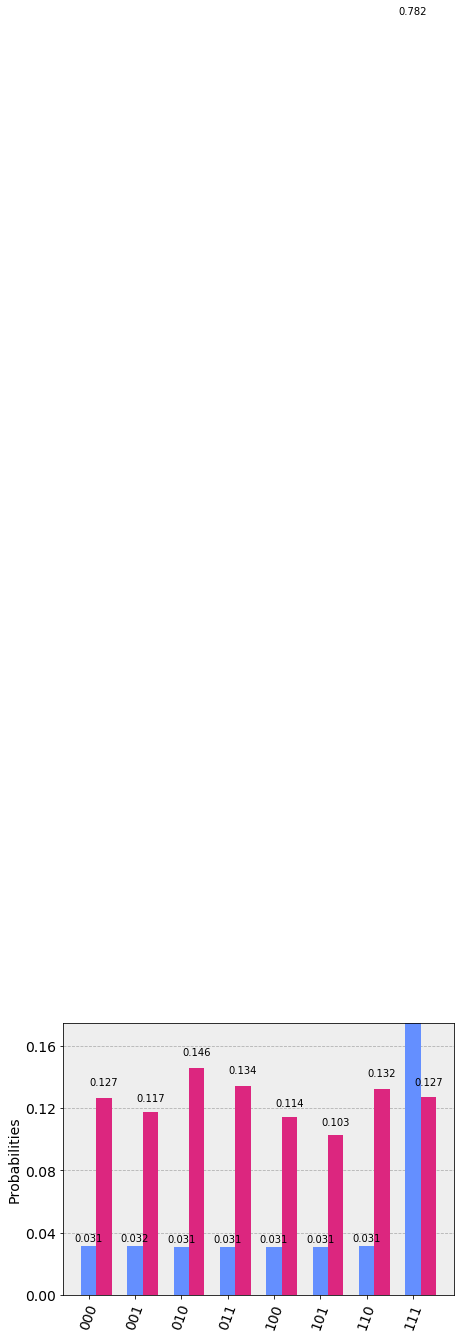

In [64]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

# N=3 Grover Search - Phase Oracle - Qubits: 4, 10, 11 - Iterations: 2

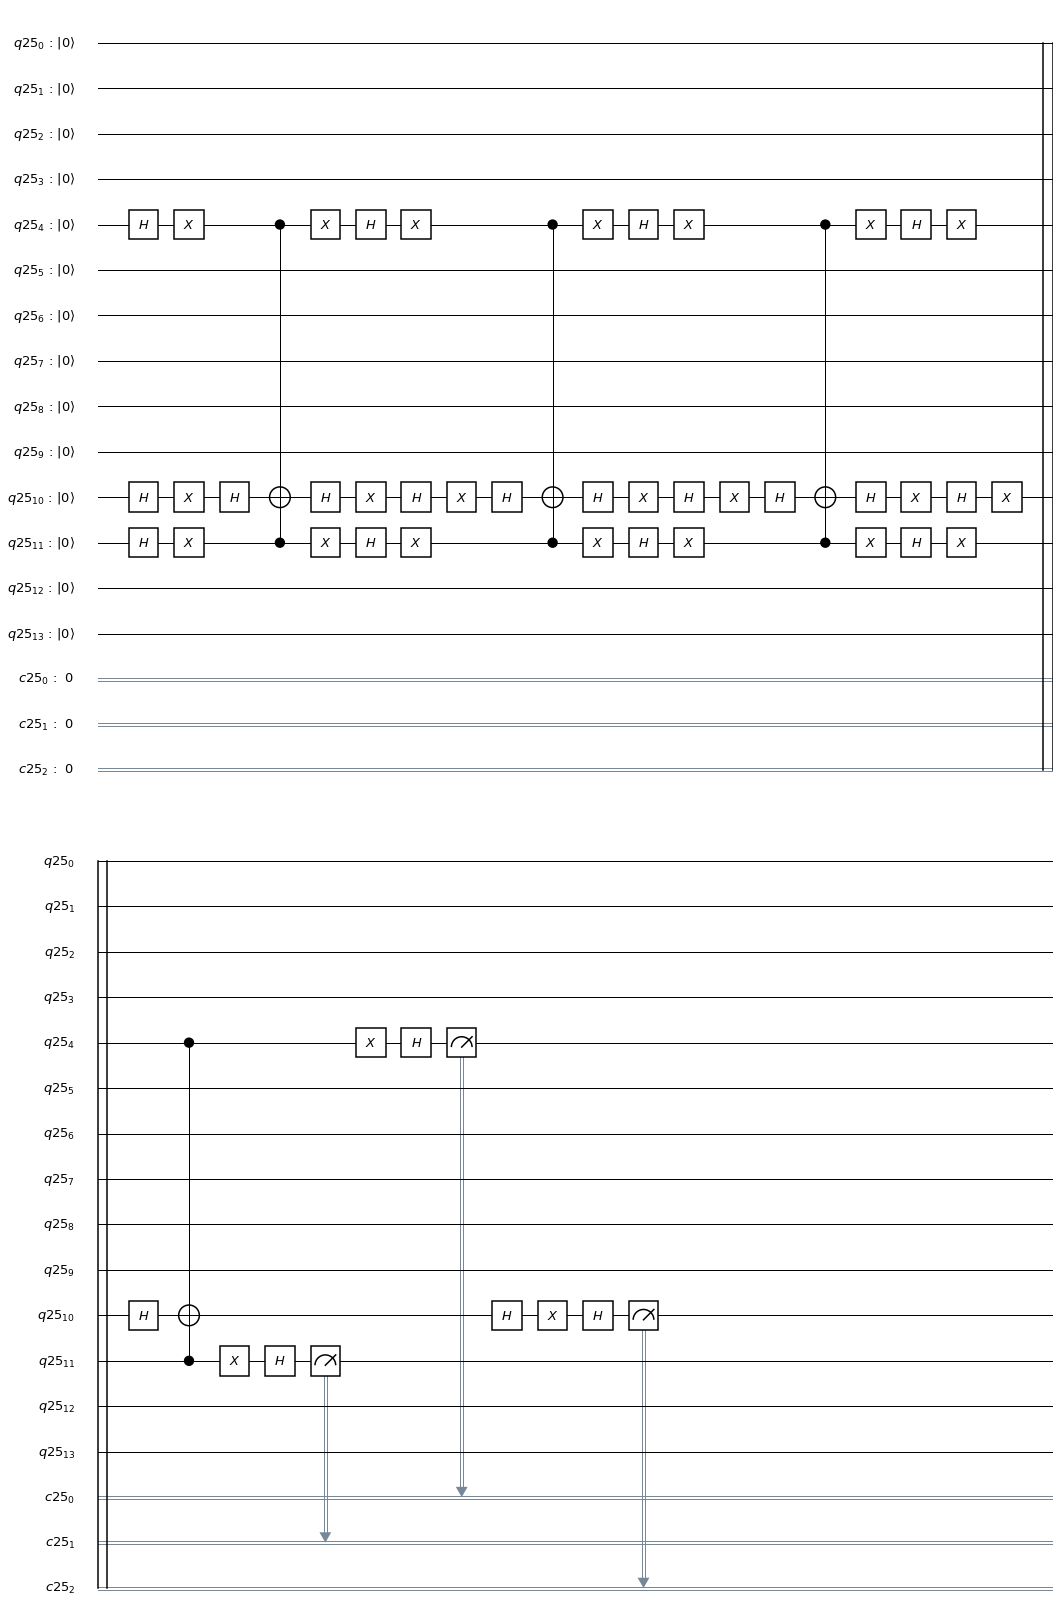

In [65]:
# N=3 Grover Search - Phase Oracle - Marked Item (000) - Qubits: 4, 10, 11 - Iterations: 2
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[4])
qc.h(qr[11])
qc.h(qr[10])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

for j in range(2):        
    repeat()


qc.measure(qr[4],cr[0])
qc.measure(qr[11],cr[1])
qc.measure(qr[10],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

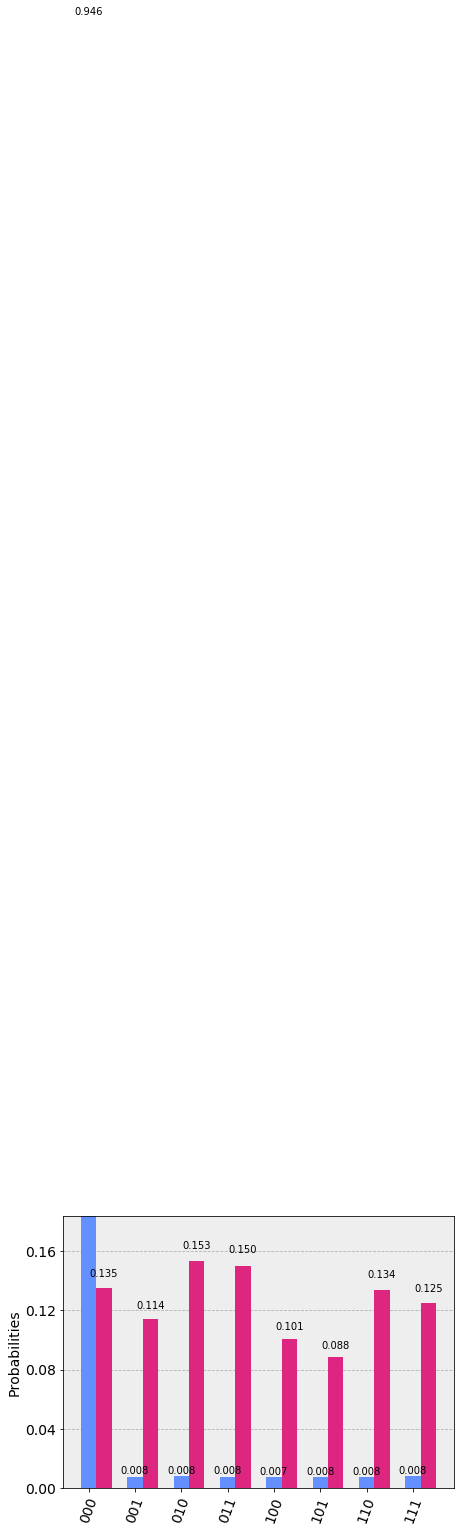

In [66]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

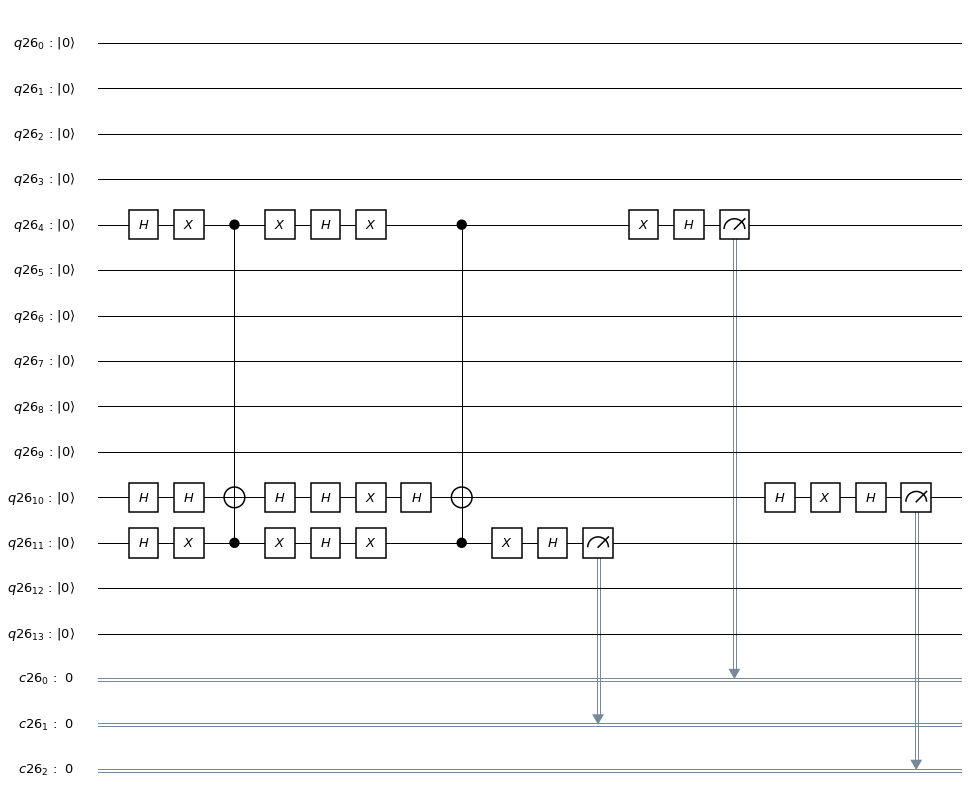

In [67]:
# N=3 Grover Search - Phase Oracle - Marked Item (001) - Qubits: 4, 10, 11 - Iterations: 1
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[4])
qc.h(qr[11])
qc.h(qr[10])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[4])
    qc.x(qr[11])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[4])
    qc.x(qr[11])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

for j in range(1):        
    repeat()


qc.measure(qr[4],cr[0])
qc.measure(qr[11],cr[1])
qc.measure(qr[10],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

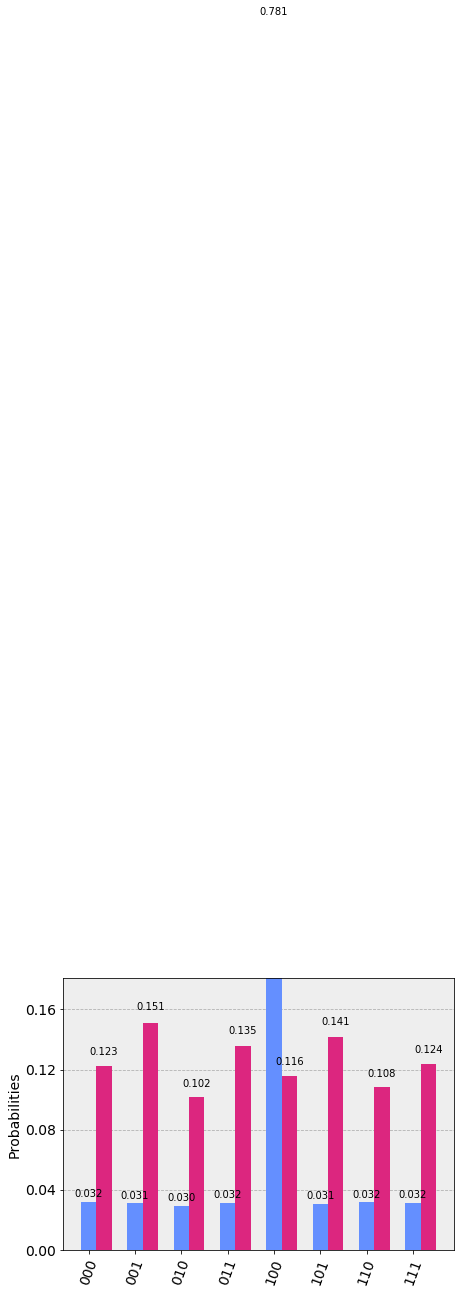

In [68]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

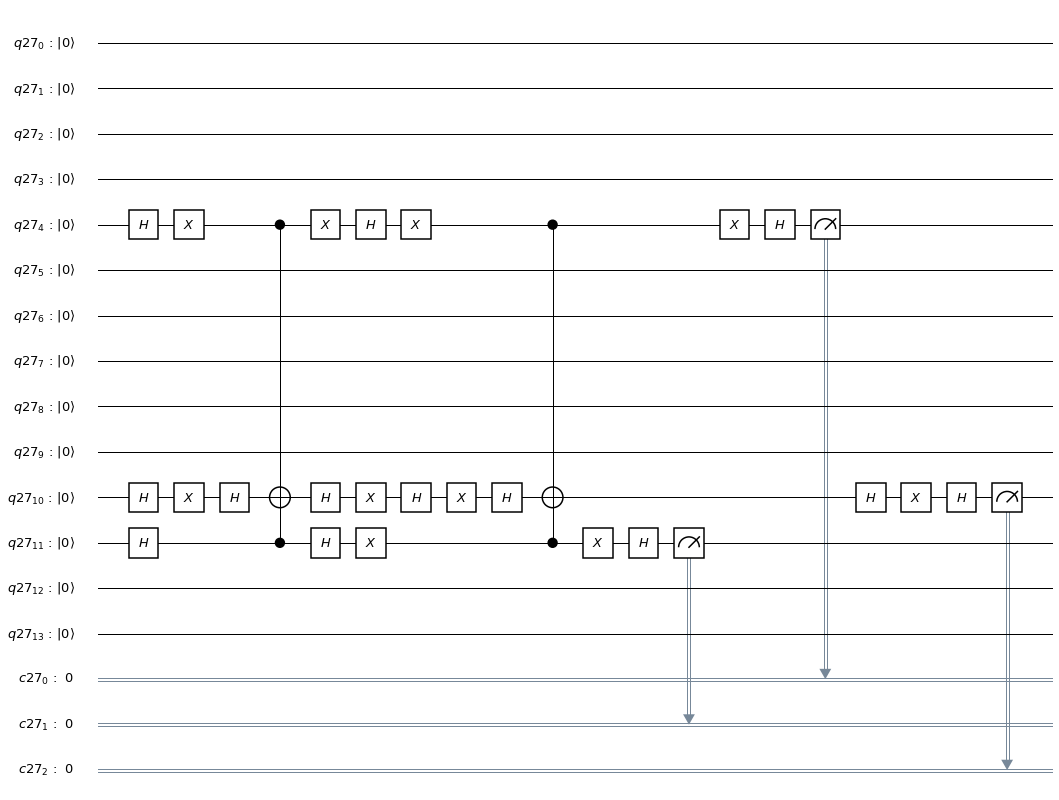

In [69]:
# N=3 Grover Search - Phase Oracle - Marked Item (010) - Qubits: 4, 10, 11 - Iterations: 1
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[4])
qc.h(qr[11])
qc.h(qr[10])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[4])
    qc.x(qr[10])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[4])
    qc.x(qr[10])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

for j in range(1):        
    repeat()


qc.measure(qr[4],cr[0])
qc.measure(qr[11],cr[1])
qc.measure(qr[10],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

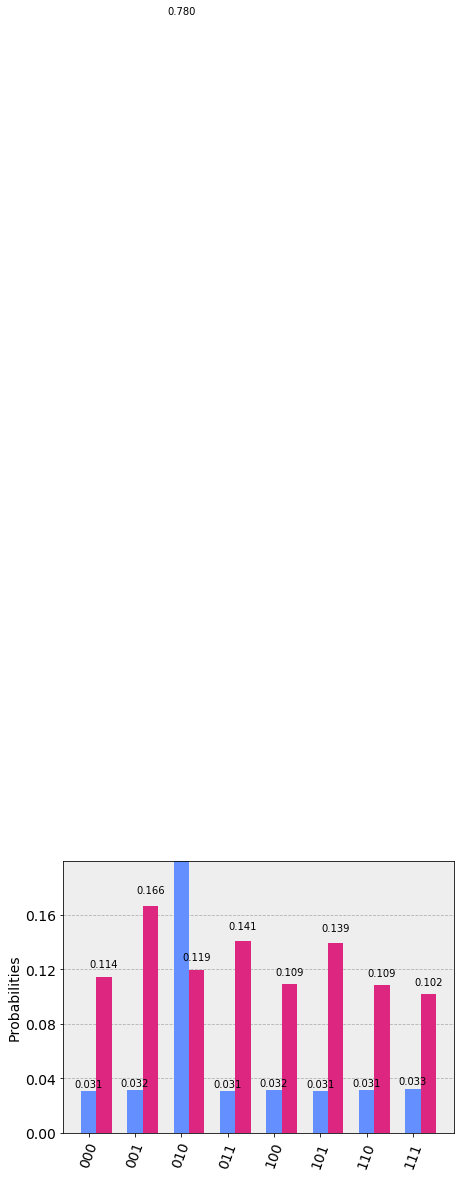

In [70]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

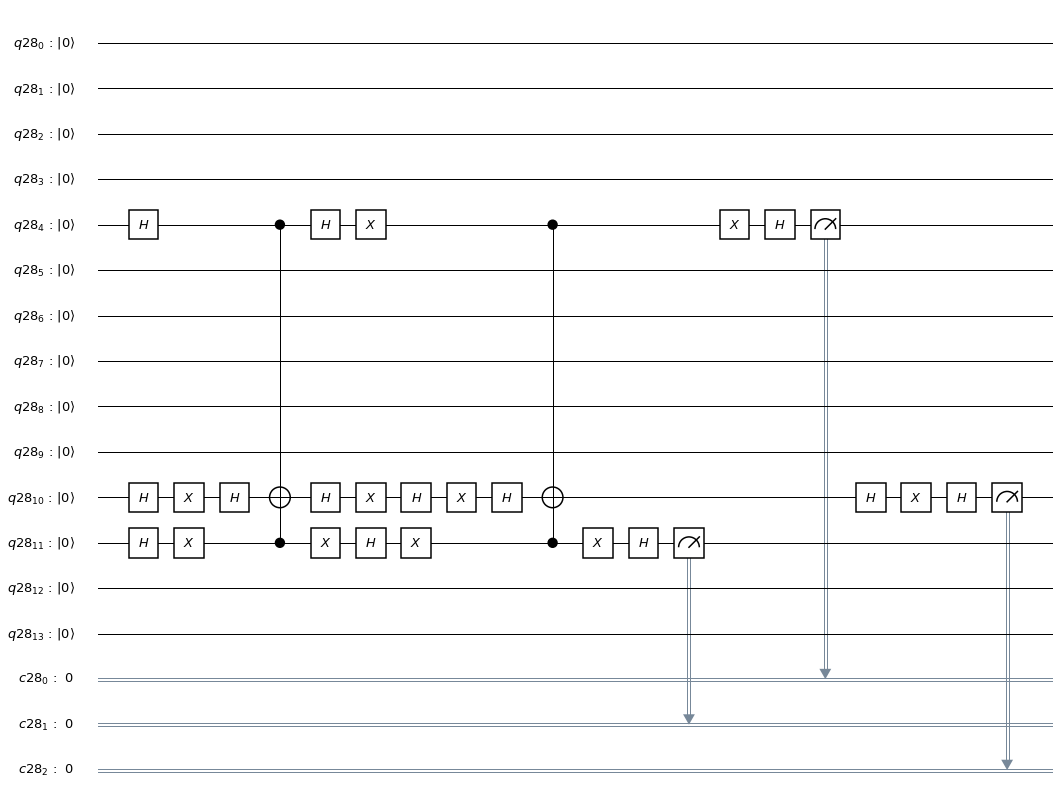

In [71]:
# N=3 Grover Search - Phase Oracle - Marked Item (100) - Qubits: 4, 10, 11 - Iterations: 1
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[4])
qc.h(qr[11])
qc.h(qr[10])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[11])
    qc.x(qr[10])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[11])
    qc.x(qr[10])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

for j in range(1):        
    repeat()


qc.measure(qr[4],cr[0])
qc.measure(qr[11],cr[1])
qc.measure(qr[10],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

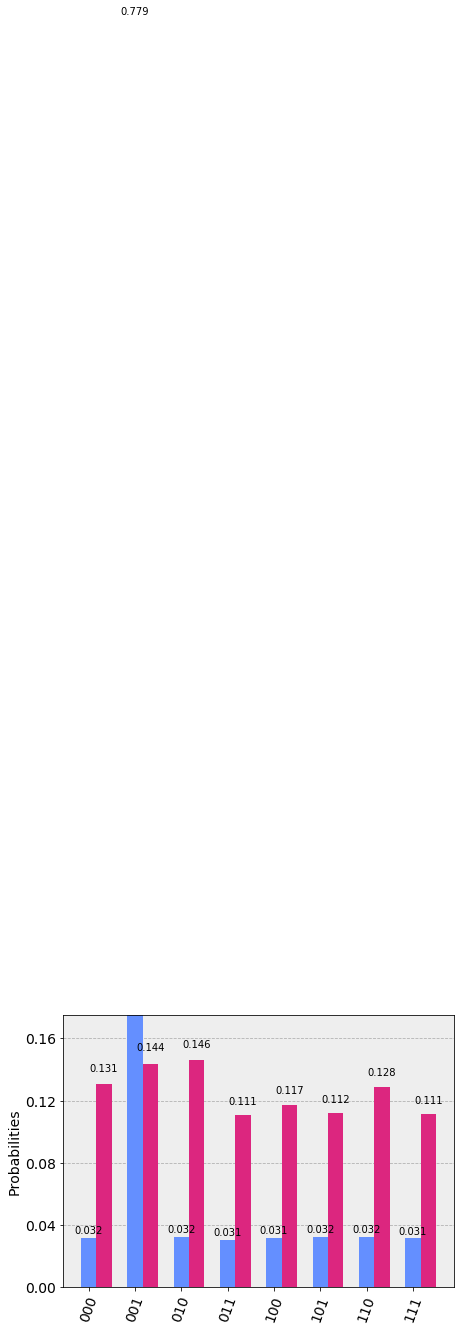

In [72]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

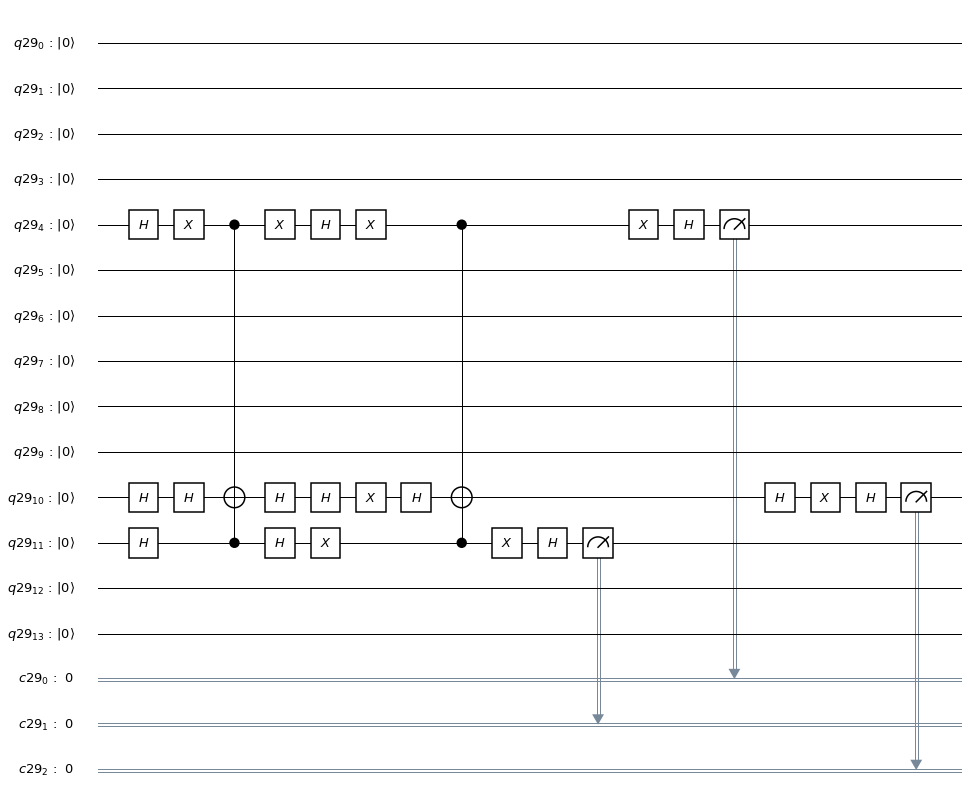

In [73]:
# N=3 Grover Search - Phase Oracle - Marked Item (011) - Qubits: 4, 10, 11 - Iterations: 1
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[4])
qc.h(qr[11])
qc.h(qr[10])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[4])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[4])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

for j in range(1):        
    repeat()


qc.measure(qr[4],cr[0])
qc.measure(qr[11],cr[1])
qc.measure(qr[10],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

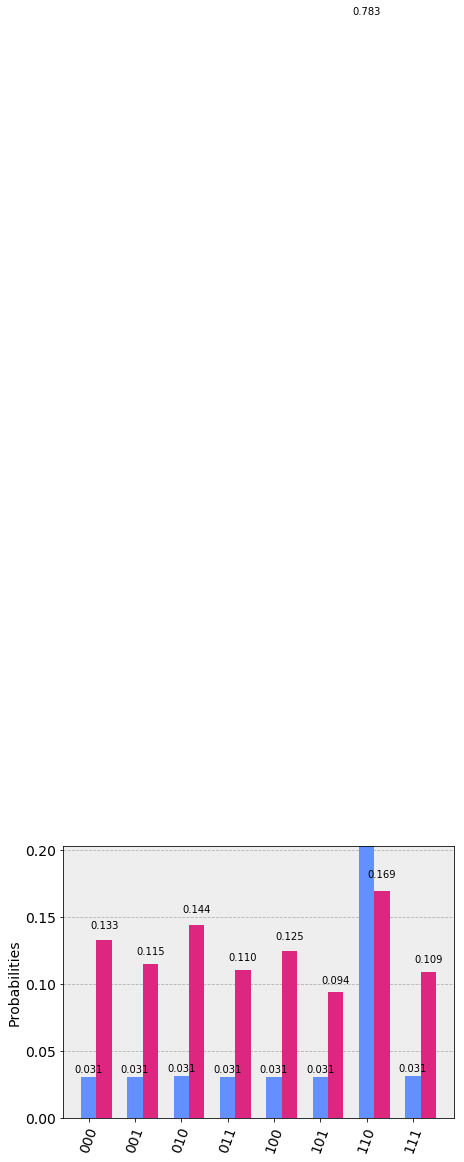

In [74]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

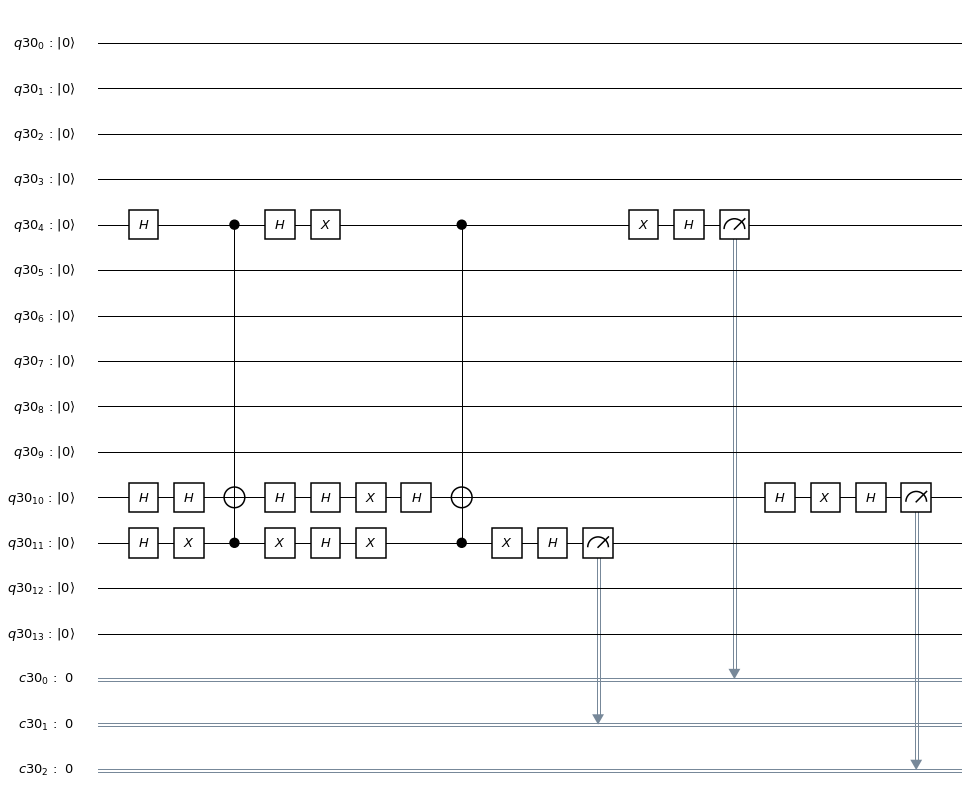

In [75]:
# N=3 Grover Search - Phase Oracle - Marked Item (101) - Qubits: 4, 10, 11 - Iterations: 1
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[4])
qc.h(qr[11])
qc.h(qr[10])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[11])
 
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[11])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

for j in range(1):        
    repeat()


qc.measure(qr[4],cr[0])
qc.measure(qr[11],cr[1])
qc.measure(qr[10],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

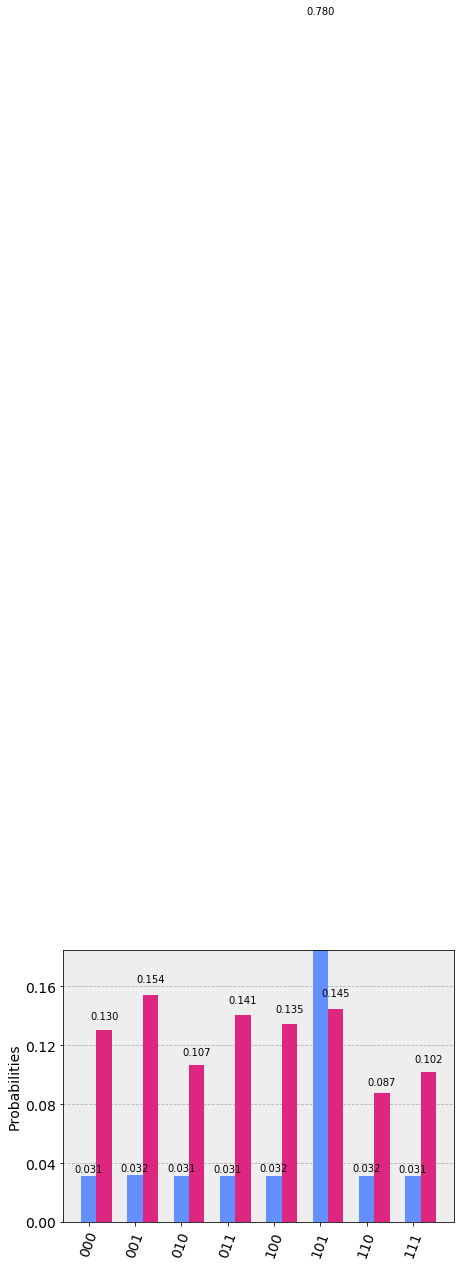

In [76]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

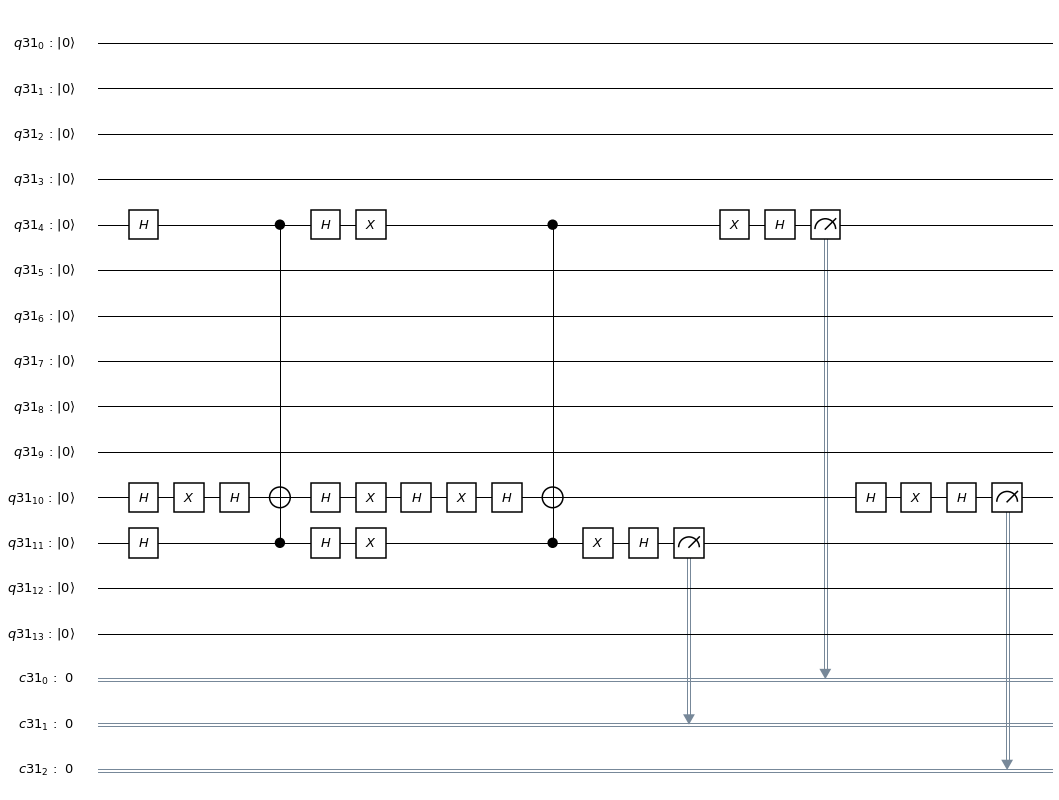

In [77]:
# N=3 Grover Search - Phase Oracle - Marked Item (110) - Qubits: 4, 10, 11 - Iterations: 1
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[4])
qc.h(qr[11])
qc.h(qr[10])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[10])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[10])
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

for j in range(1):        
    repeat()


qc.measure(qr[4],cr[0])
qc.measure(qr[11],cr[1])
qc.measure(qr[10],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

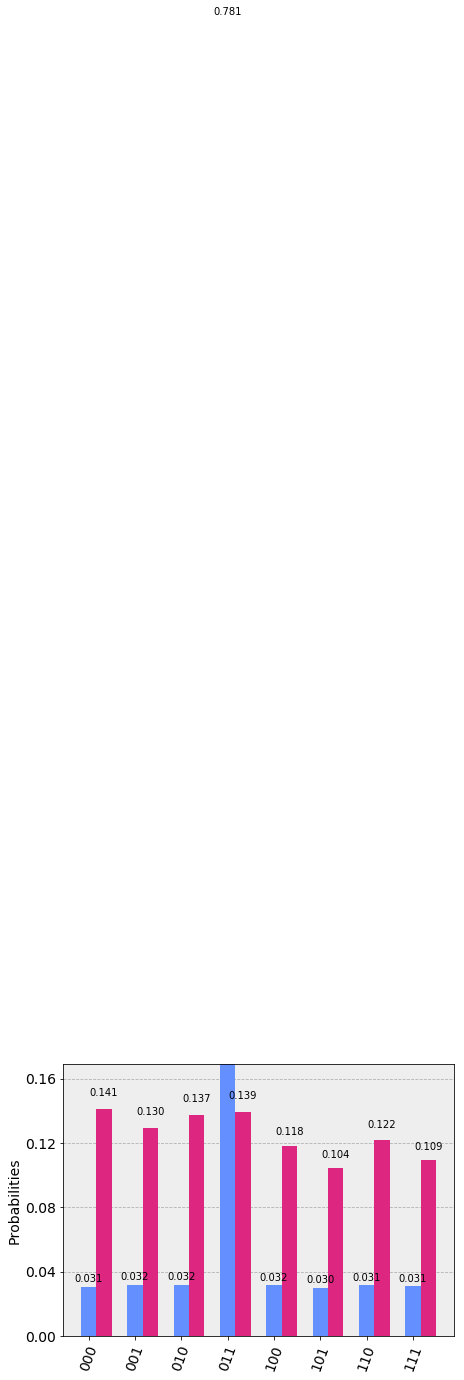

In [78]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

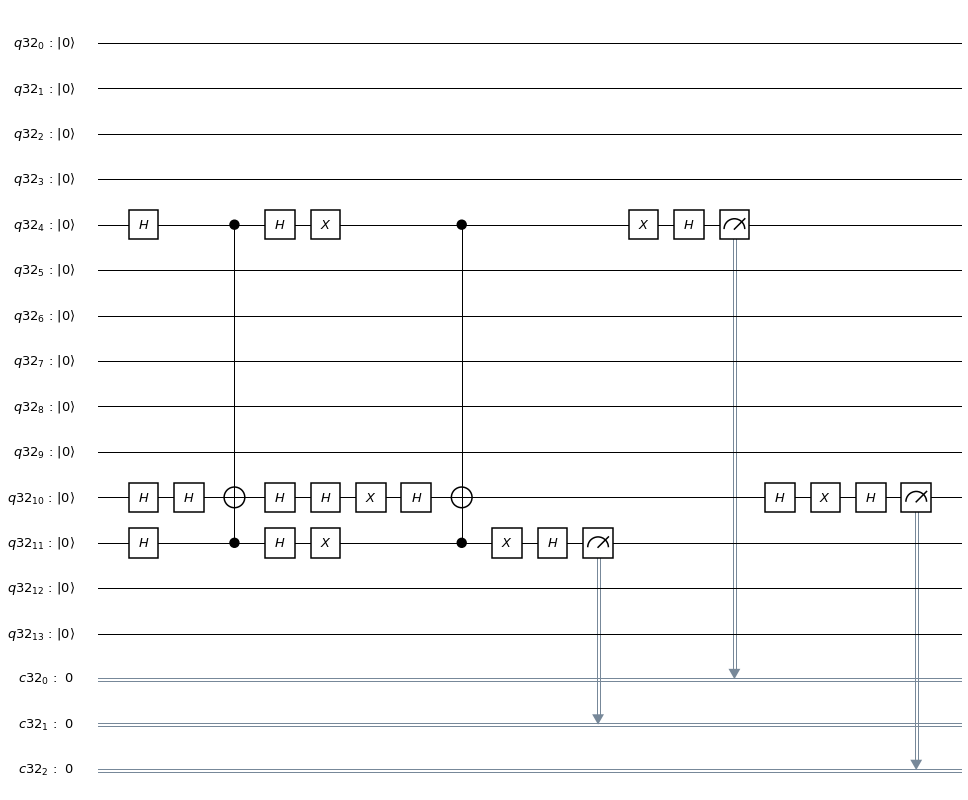

In [79]:
# N=3 Grover Search - Phase Oracle - Marked Item (111) - Qubits: 4, 10, 11 - Iterations: 1
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[4])
qc.h(qr[11])
qc.h(qr[10])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    
    # Amplification
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    # CCNOT
    qc.h(qr[10])
    qc.ccx(qr[4],qr[11],qr[10])
    qc.h(qr[10])
    
    qc.x(qr[4])
    qc.x(qr[11])
    qc.x(qr[10])
    
    qc.h(qr[4])
    qc.h(qr[11])
    qc.h(qr[10])

for j in range(1):        
    repeat()


qc.measure(qr[4],cr[0])
qc.measure(qr[11],cr[1])
qc.measure(qr[10],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

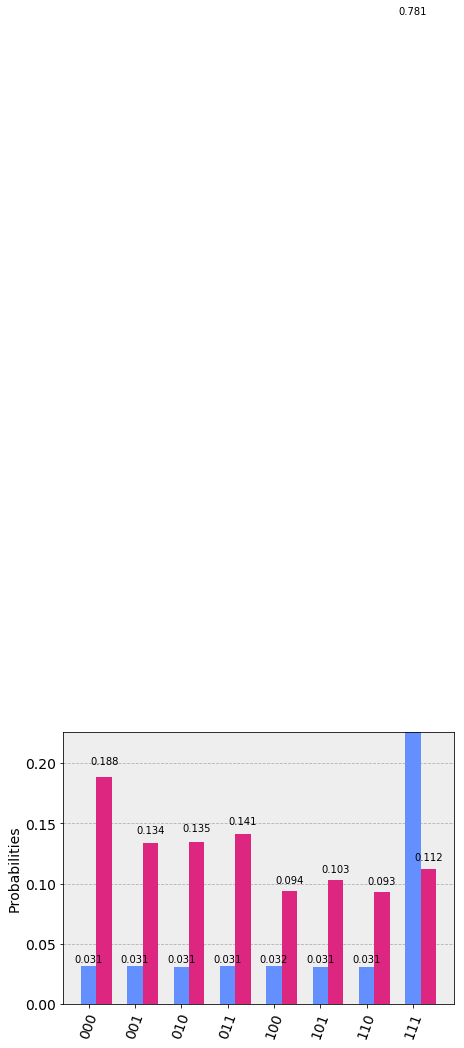

In [80]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

# N=3 Grover Search - Phase Oracle - Qubits: 6, 7, 8 - Iterations: 2

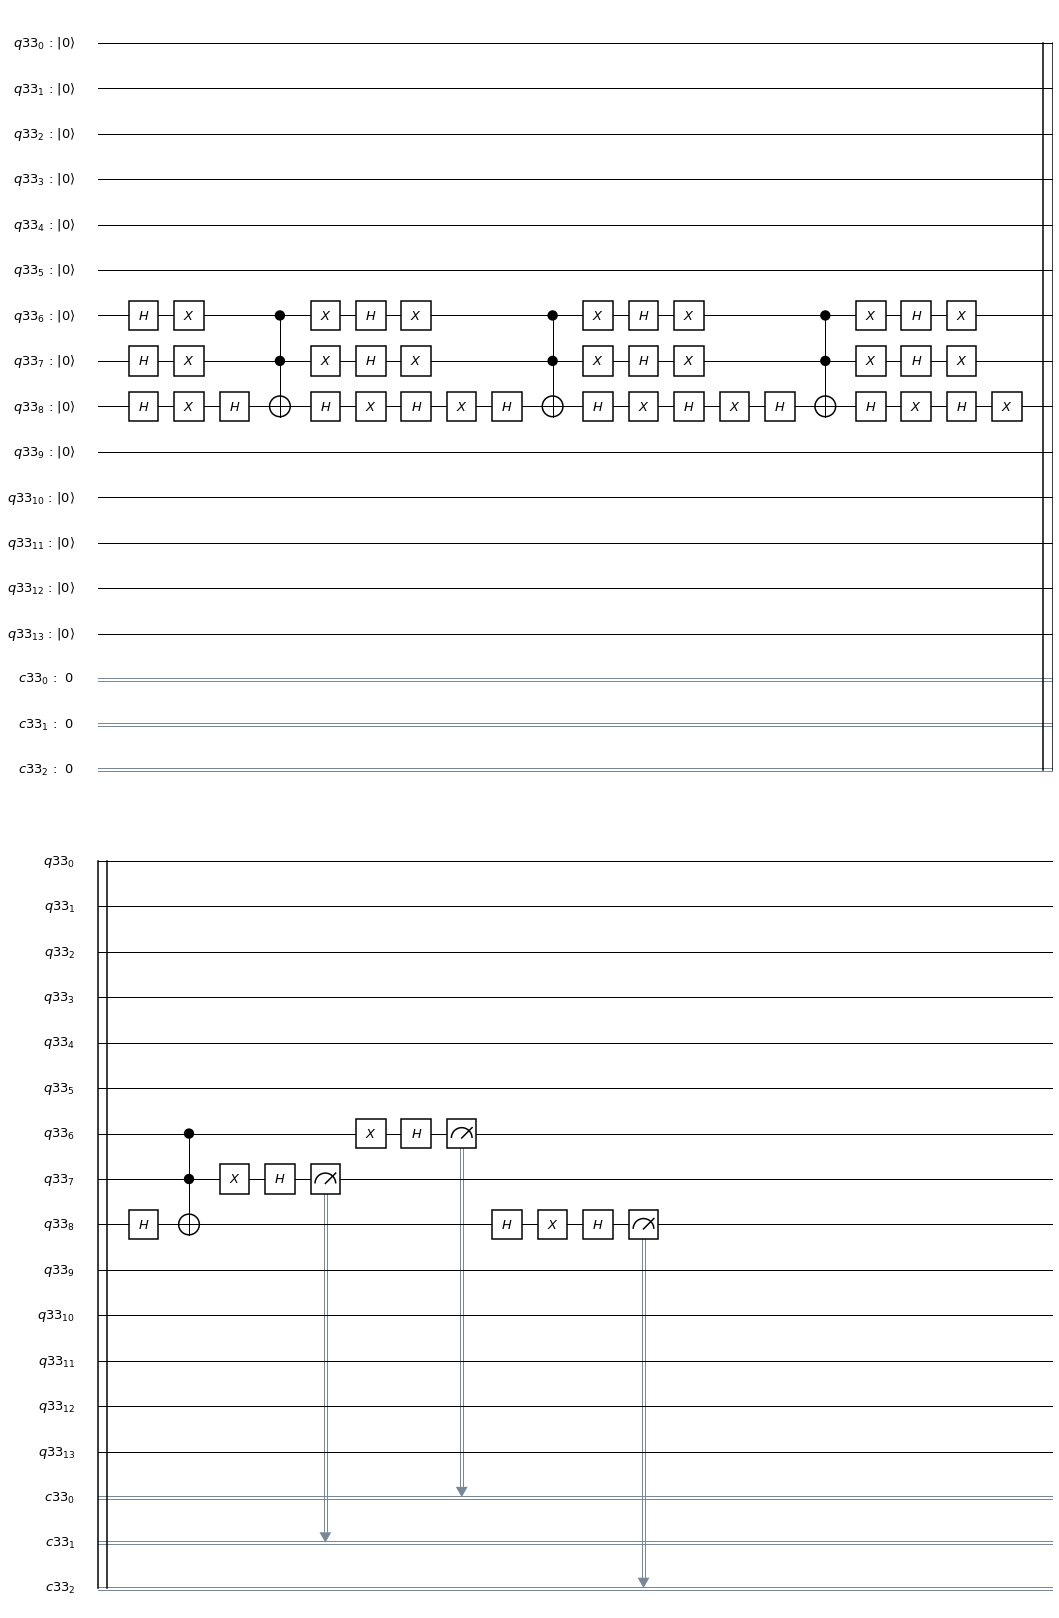

In [81]:
# N=3 Grover Search - Phase Oracle - Marked Item (000) - Qubits: 6, 7, 8 - Iterations: 2
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[6])
qc.h(qr[7])
qc.h(qr[8])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    # Amplification
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

for j in range(2):        
    repeat()


qc.measure(qr[6],cr[0])
qc.measure(qr[7],cr[1])
qc.measure(qr[8],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

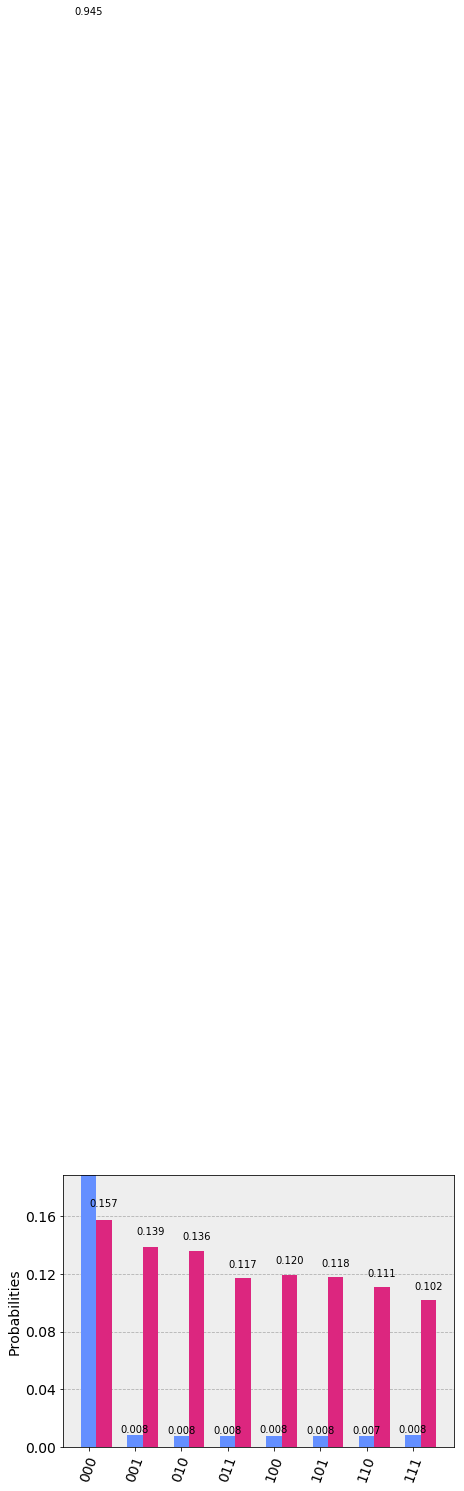

In [82]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

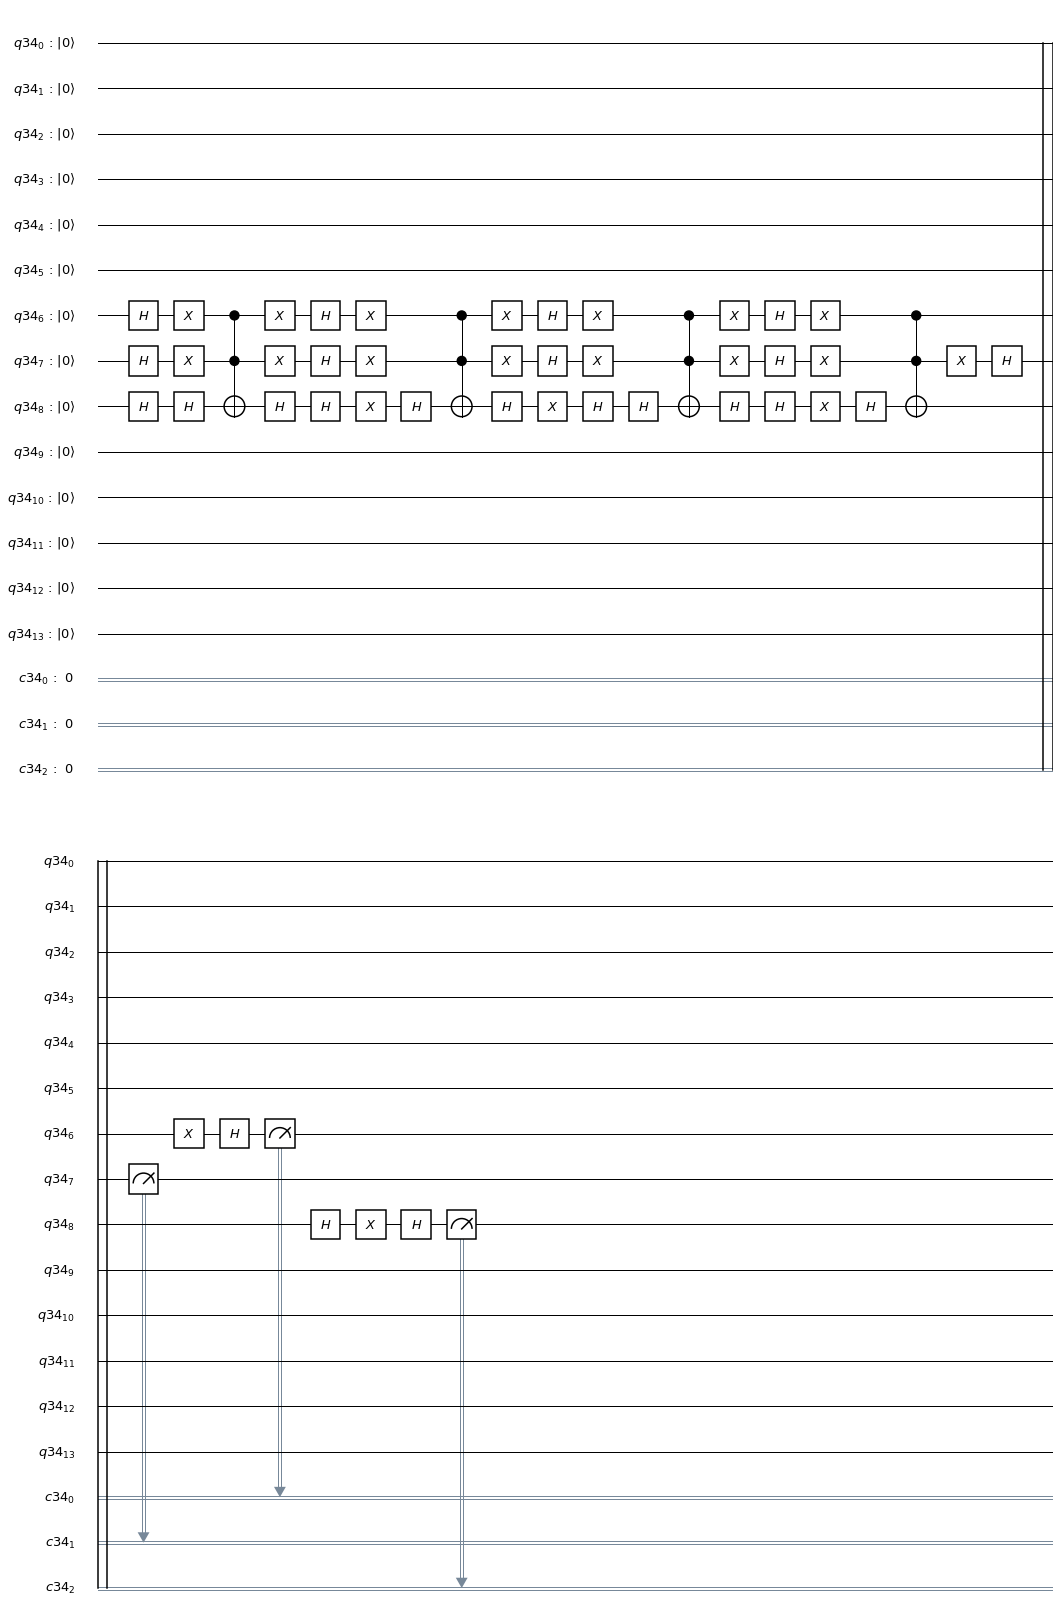

In [83]:
# N=3 Grover Search - Phase Oracle - Marked Item (001) - Qubits: 6, 7, 8 - Iterations: 2
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[6])
qc.h(qr[7])
qc.h(qr[8])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[6])
    qc.x(qr[7])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[6])
    qc.x(qr[7])
    
    # Amplification
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

for j in range(2):        
    repeat()


qc.measure(qr[6],cr[0])
qc.measure(qr[7],cr[1])
qc.measure(qr[8],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

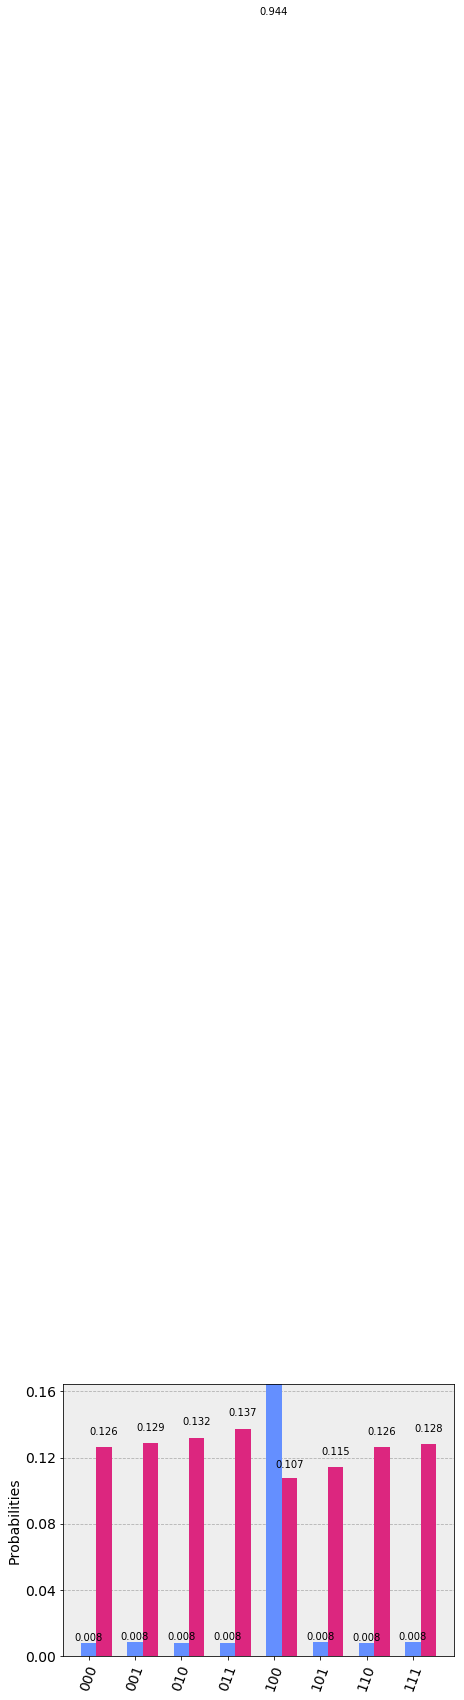

In [84]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

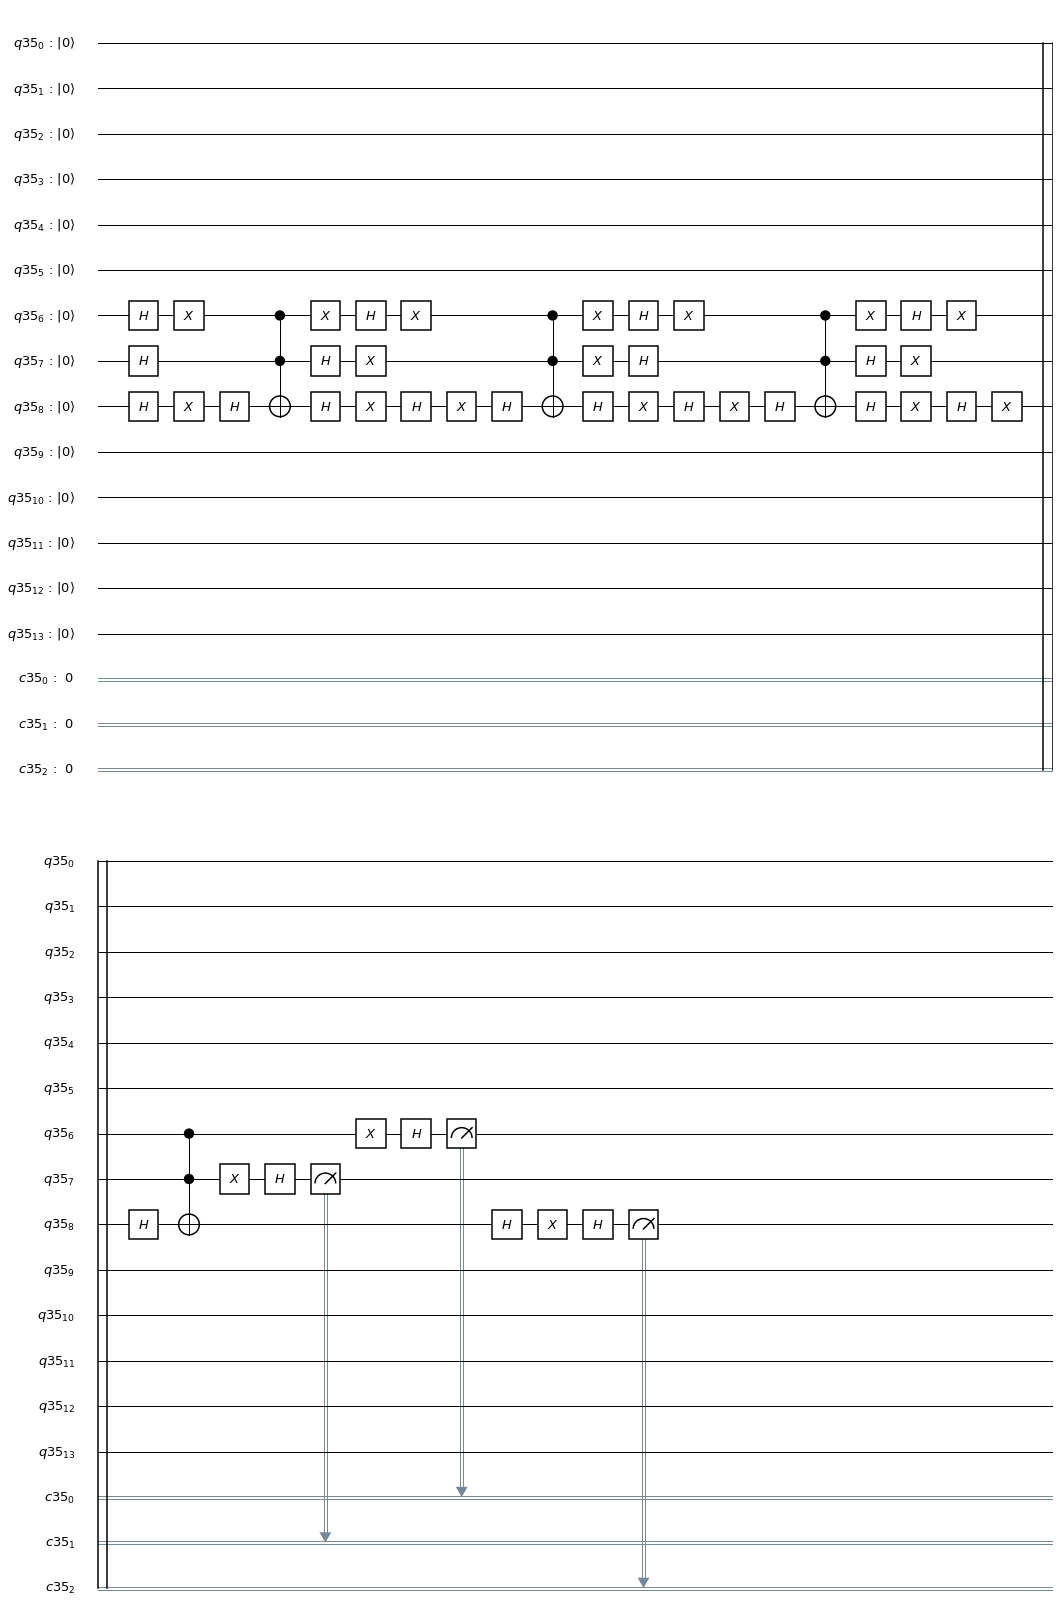

In [85]:
# N=3 Grover Search - Phase Oracle - Marked Item (010) - Qubits: 6, 7, 8 - Iterations: 2
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[6])
qc.h(qr[7])
qc.h(qr[8])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[6])
    qc.x(qr[8])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[6])
    qc.x(qr[8])
    
    # Amplification
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

for j in range(2):        
    repeat()


qc.measure(qr[6],cr[0])
qc.measure(qr[7],cr[1])
qc.measure(qr[8],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

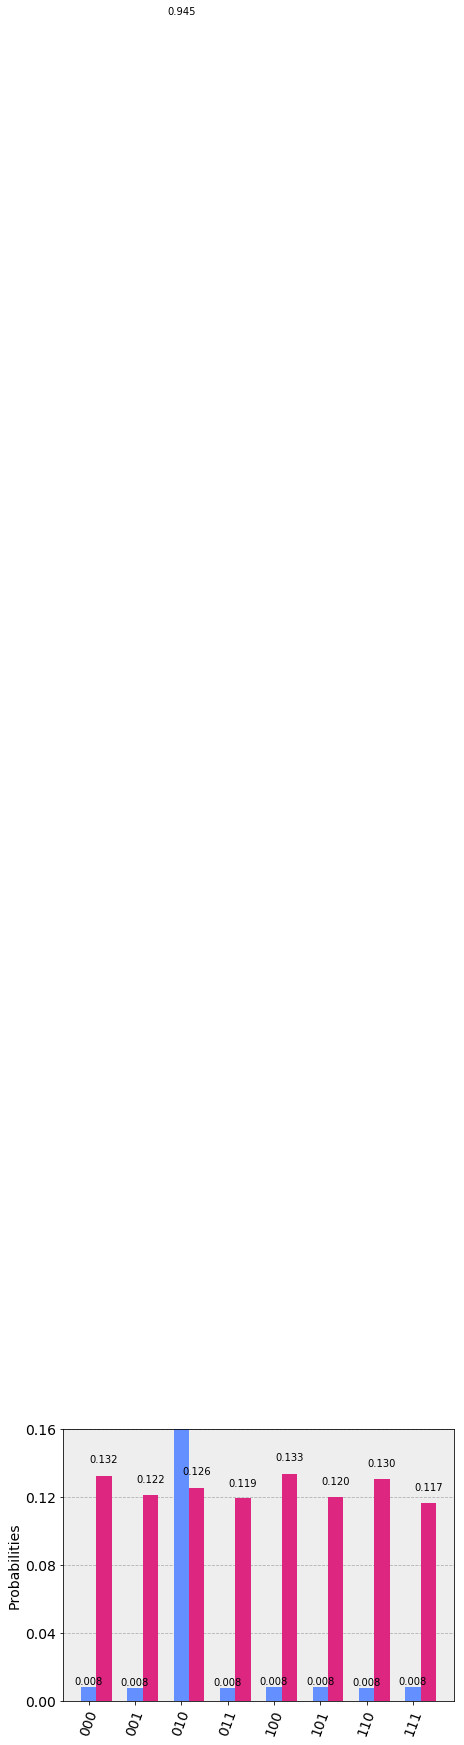

In [86]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

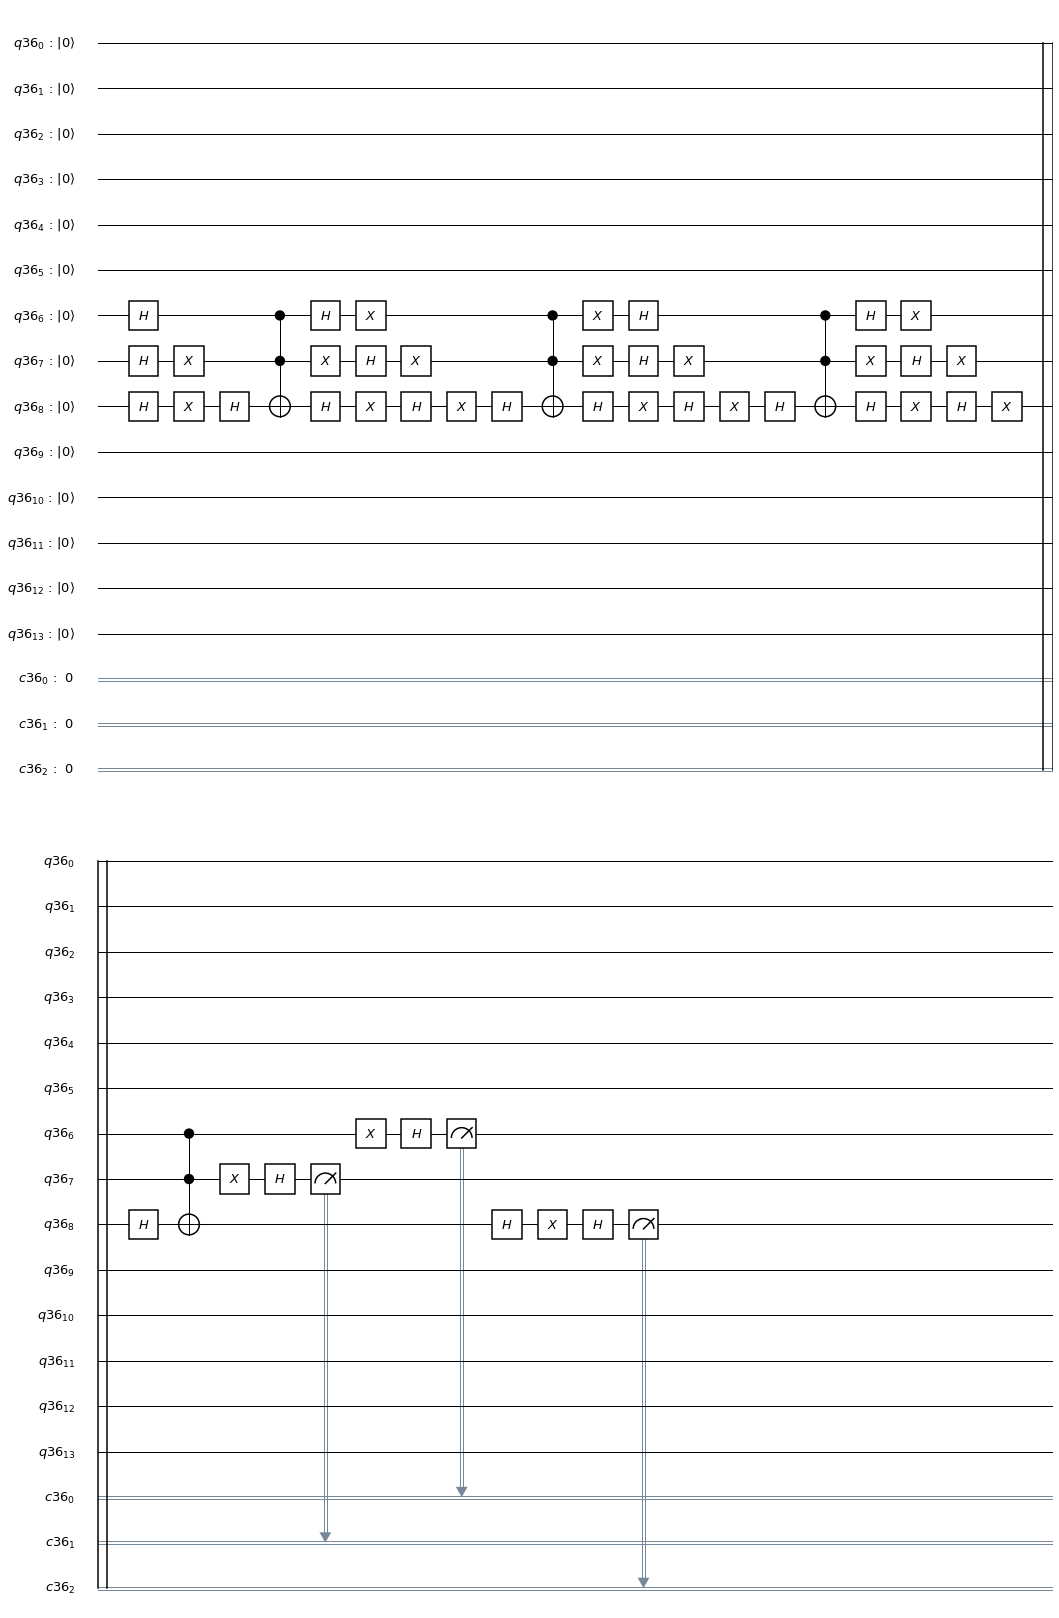

In [87]:
# N=3 Grover Search - Phase Oracle - Marked Item (100) - Qubits: 6, 7, 8 - Iterations: 2
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[6])
qc.h(qr[7])
qc.h(qr[8])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[7])
    qc.x(qr[8])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[7])
    qc.x(qr[8])
    
    # Amplification
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

for j in range(2):        
    repeat()


qc.measure(qr[6],cr[0])
qc.measure(qr[7],cr[1])
qc.measure(qr[8],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

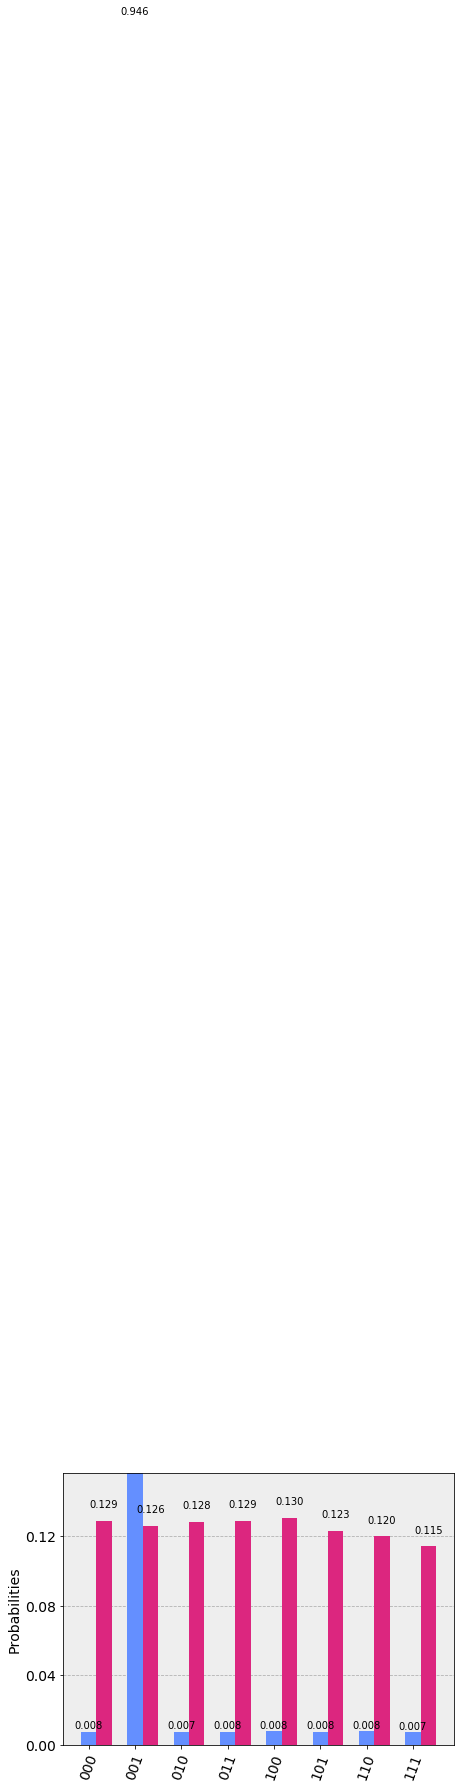

In [88]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

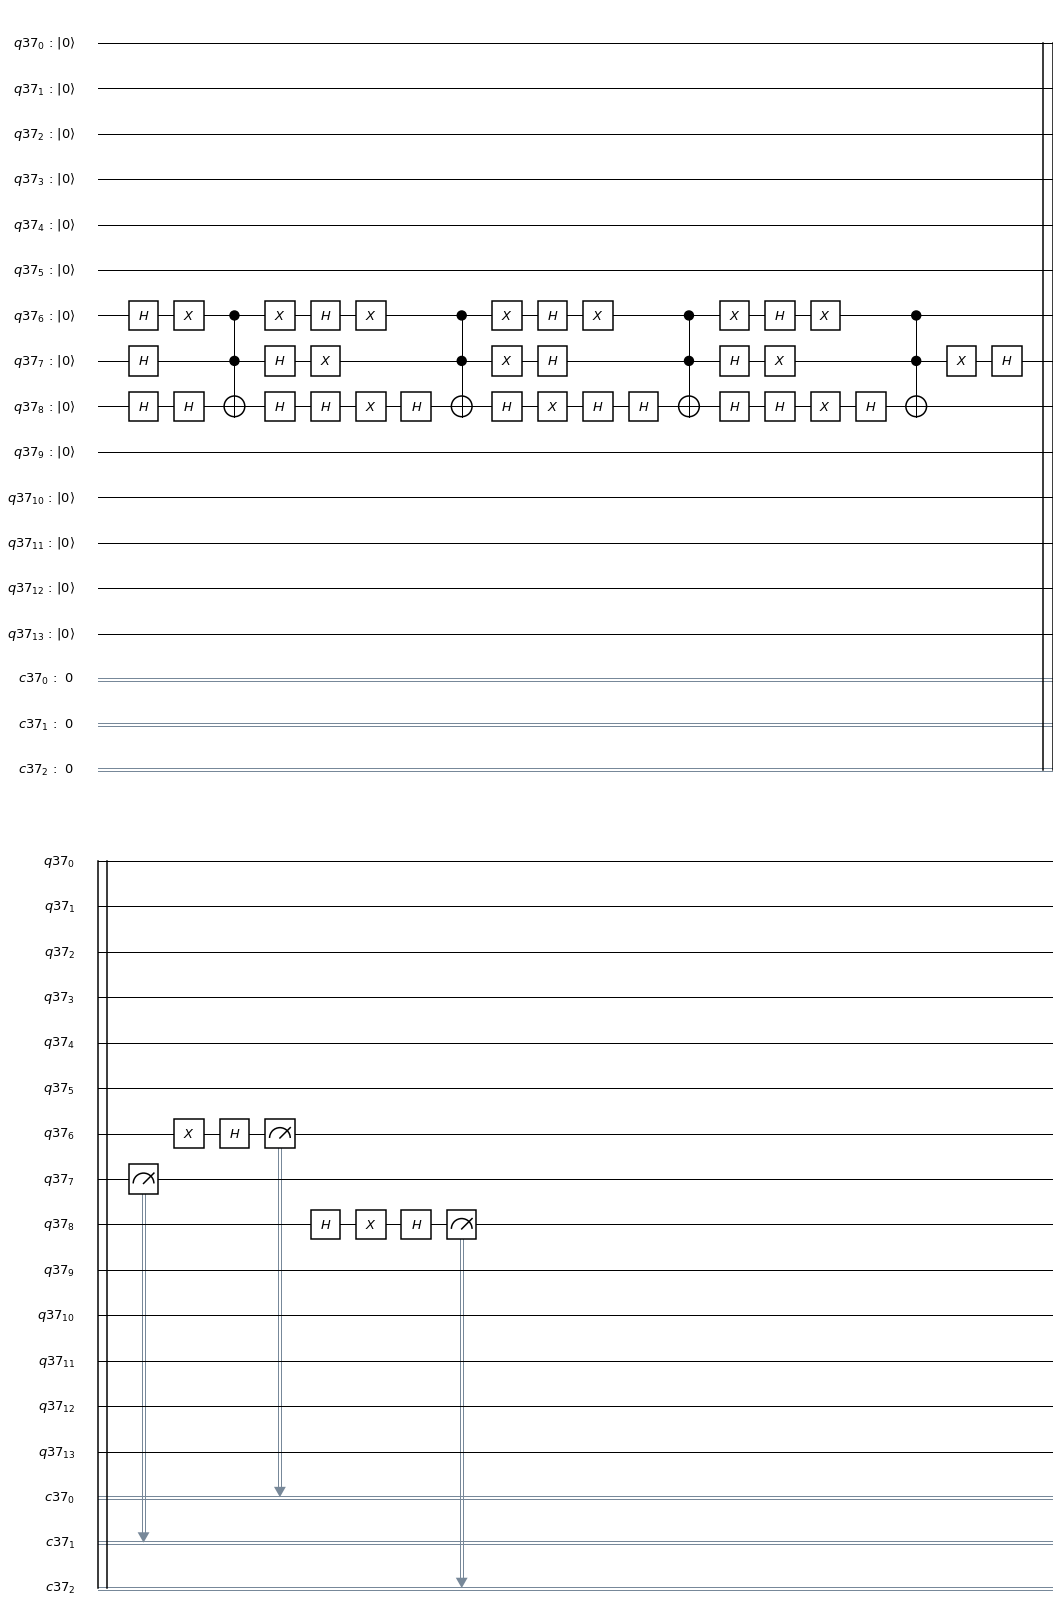

In [89]:
# N=3 Grover Search - Phase Oracle - Marked Item (011) - Qubits: 6, 7, 8 - Iterations: 2
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[6])
qc.h(qr[7])
qc.h(qr[8])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[6])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[6])
    
    # Amplification
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

for j in range(2):        
    repeat()


qc.measure(qr[6],cr[0])
qc.measure(qr[7],cr[1])
qc.measure(qr[8],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

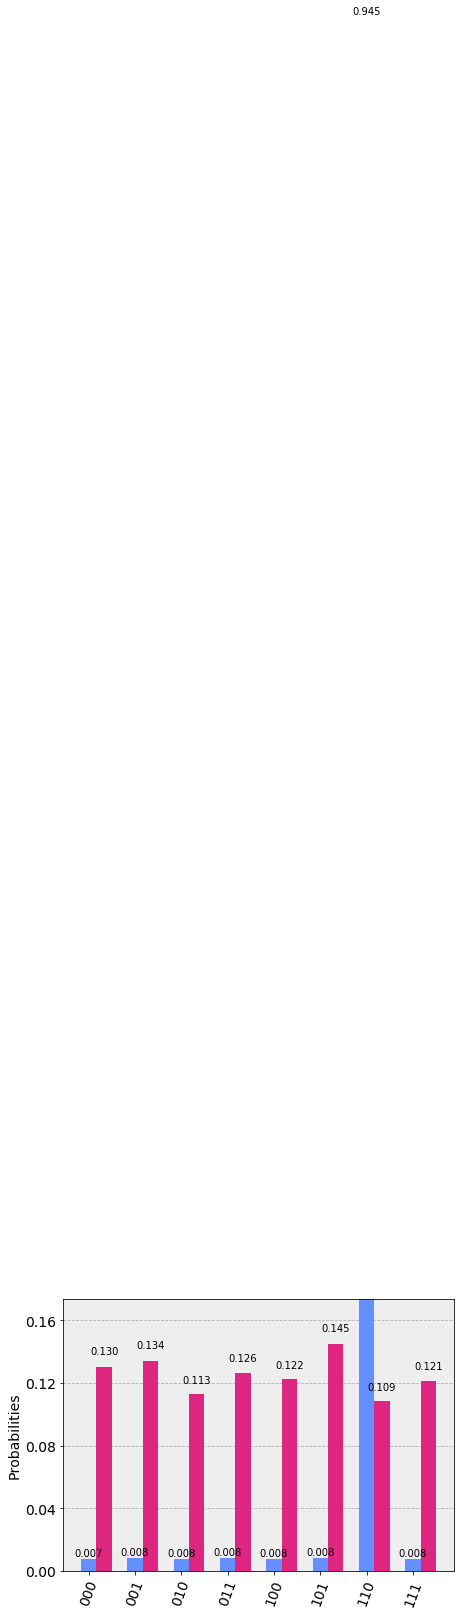

In [90]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

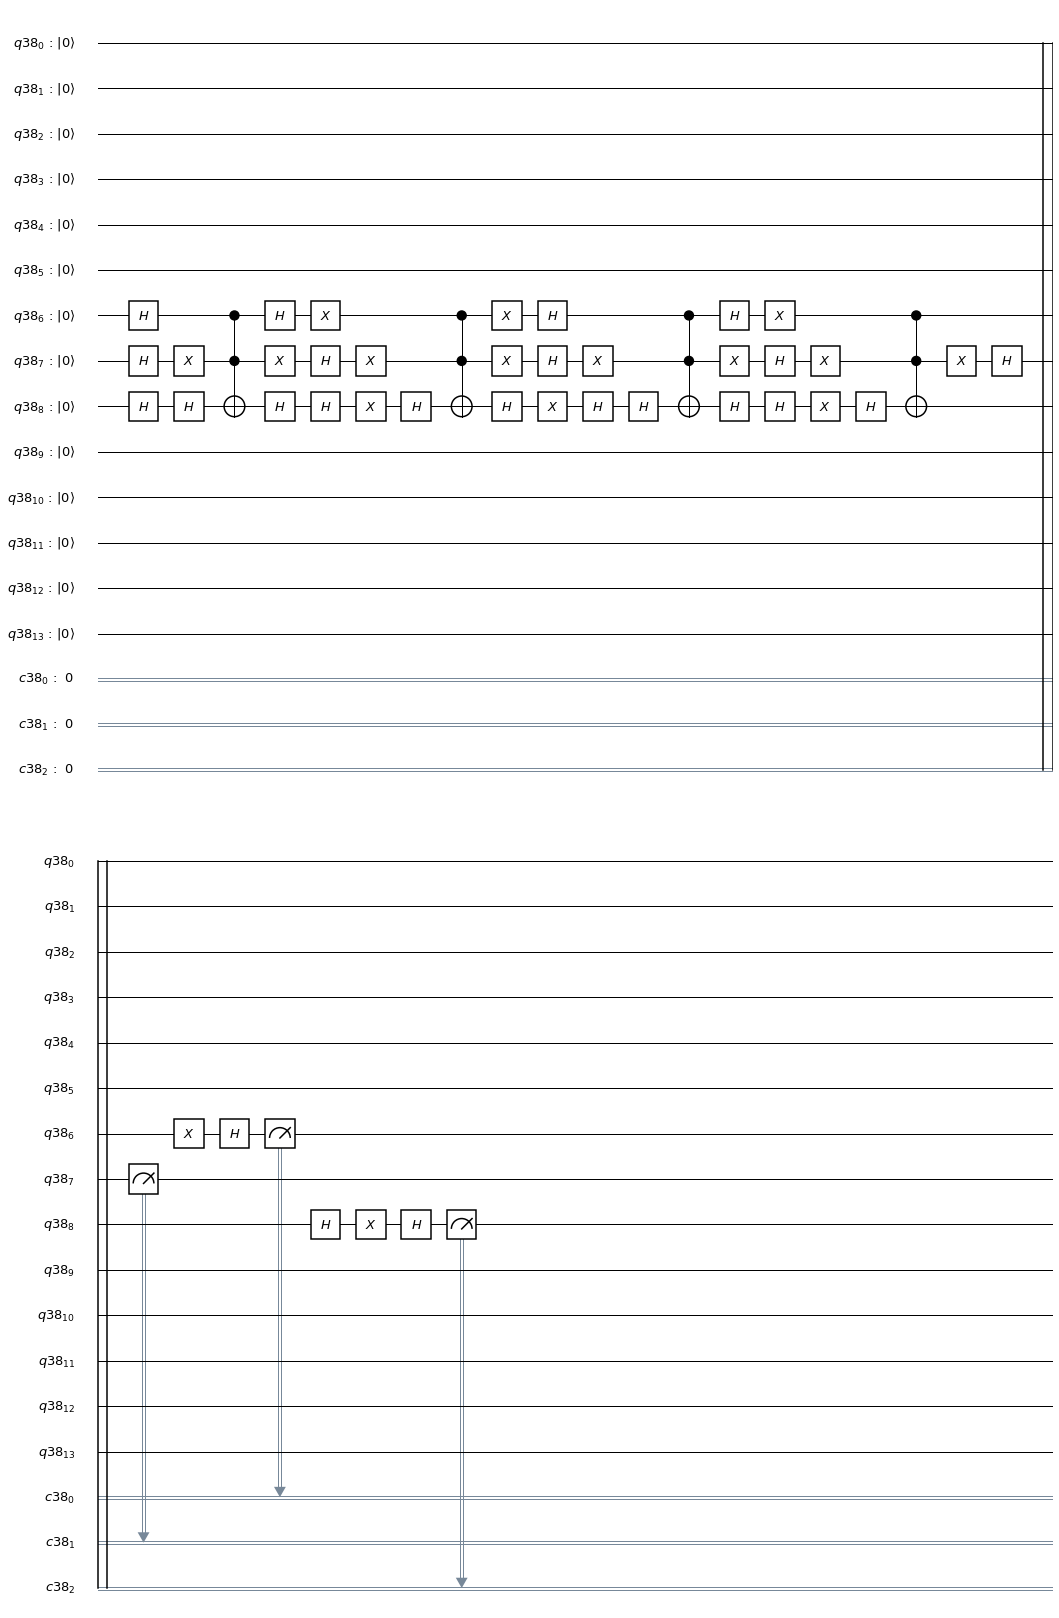

In [91]:
# N=3 Grover Search - Phase Oracle - Marked Item (101) - Qubits: 6, 7, 8 - Iterations: 2
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[6])
qc.h(qr[7])
qc.h(qr[8])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[7])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[7])
    
    # Amplification
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

for j in range(2):        
    repeat()


qc.measure(qr[6],cr[0])
qc.measure(qr[7],cr[1])
qc.measure(qr[8],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

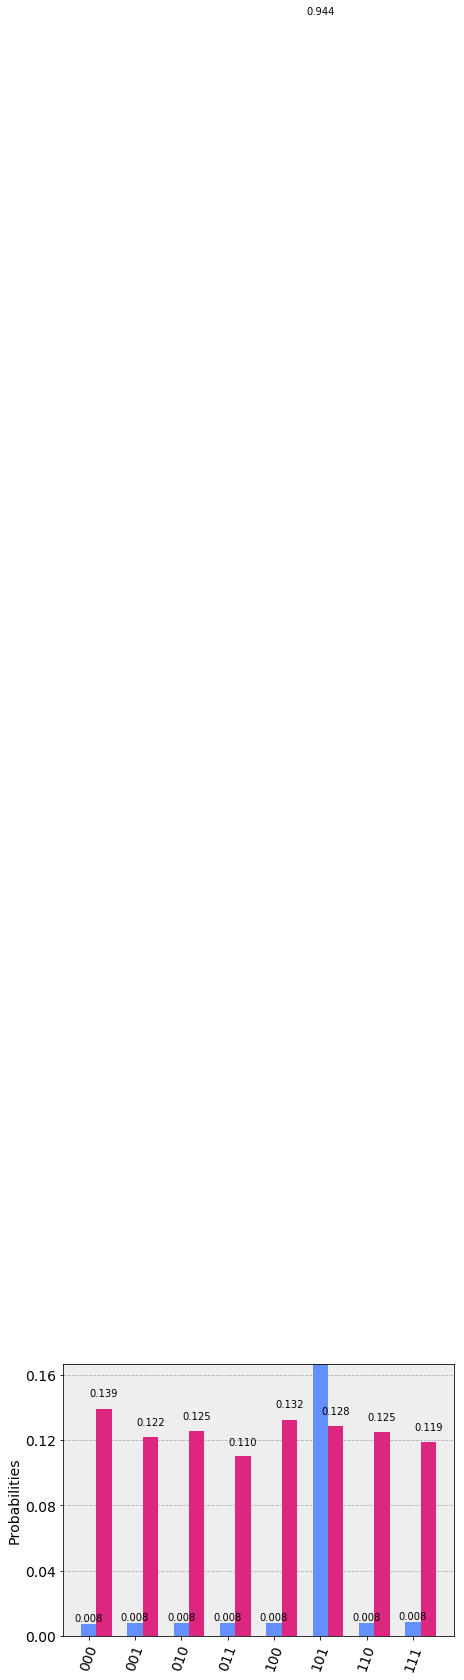

In [92]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

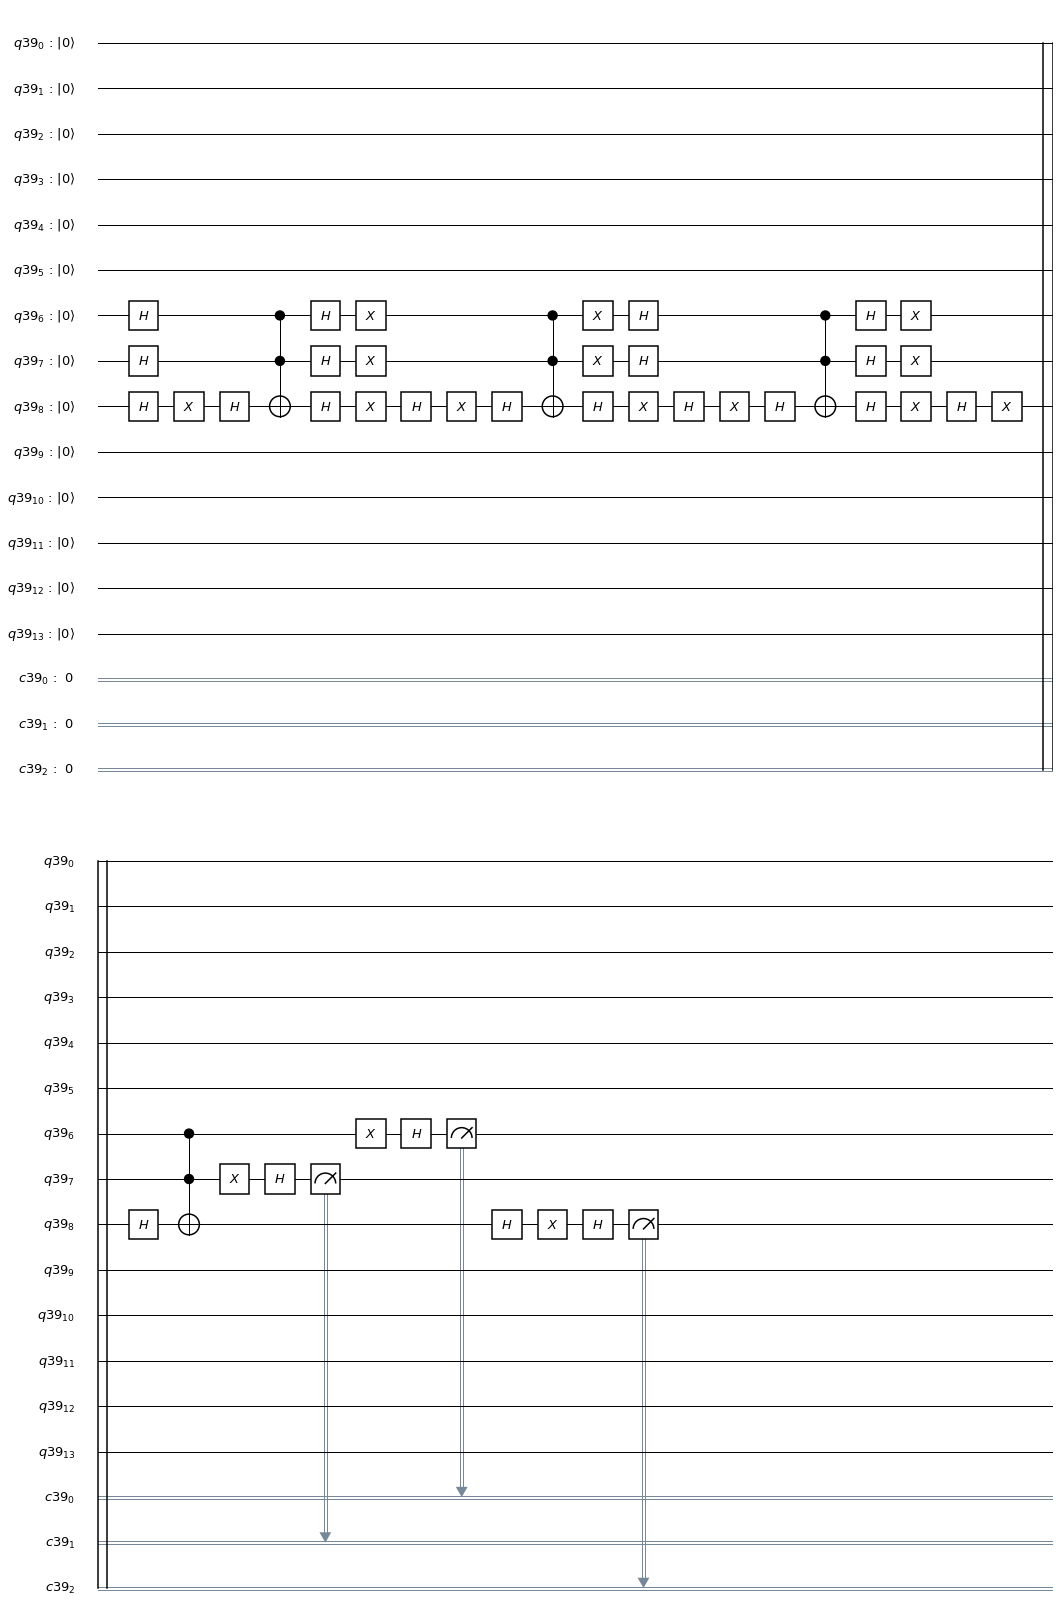

In [93]:
# N=3 Grover Search - Phase Oracle - Marked Item (110) - Qubits: 6, 7, 8 - Iterations: 2
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[6])
qc.h(qr[7])
qc.h(qr[8])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    qc.x(qr[8])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[8])
    
    # Amplification
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

for j in range(2):        
    repeat()


qc.measure(qr[6],cr[0])
qc.measure(qr[7],cr[1])
qc.measure(qr[8],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

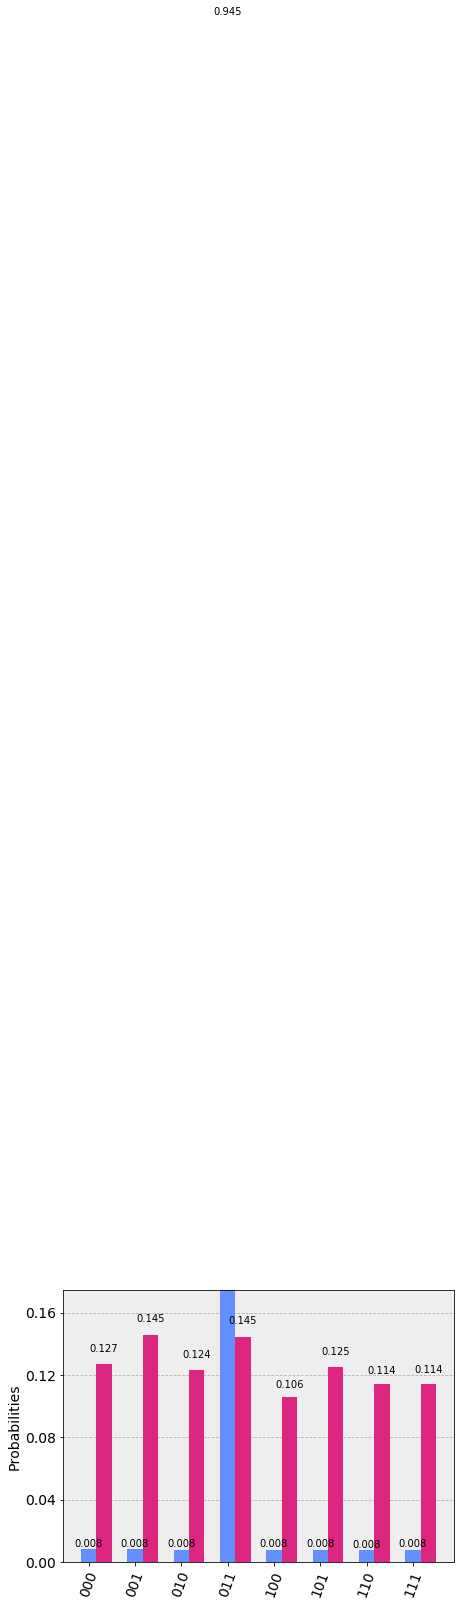

In [94]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

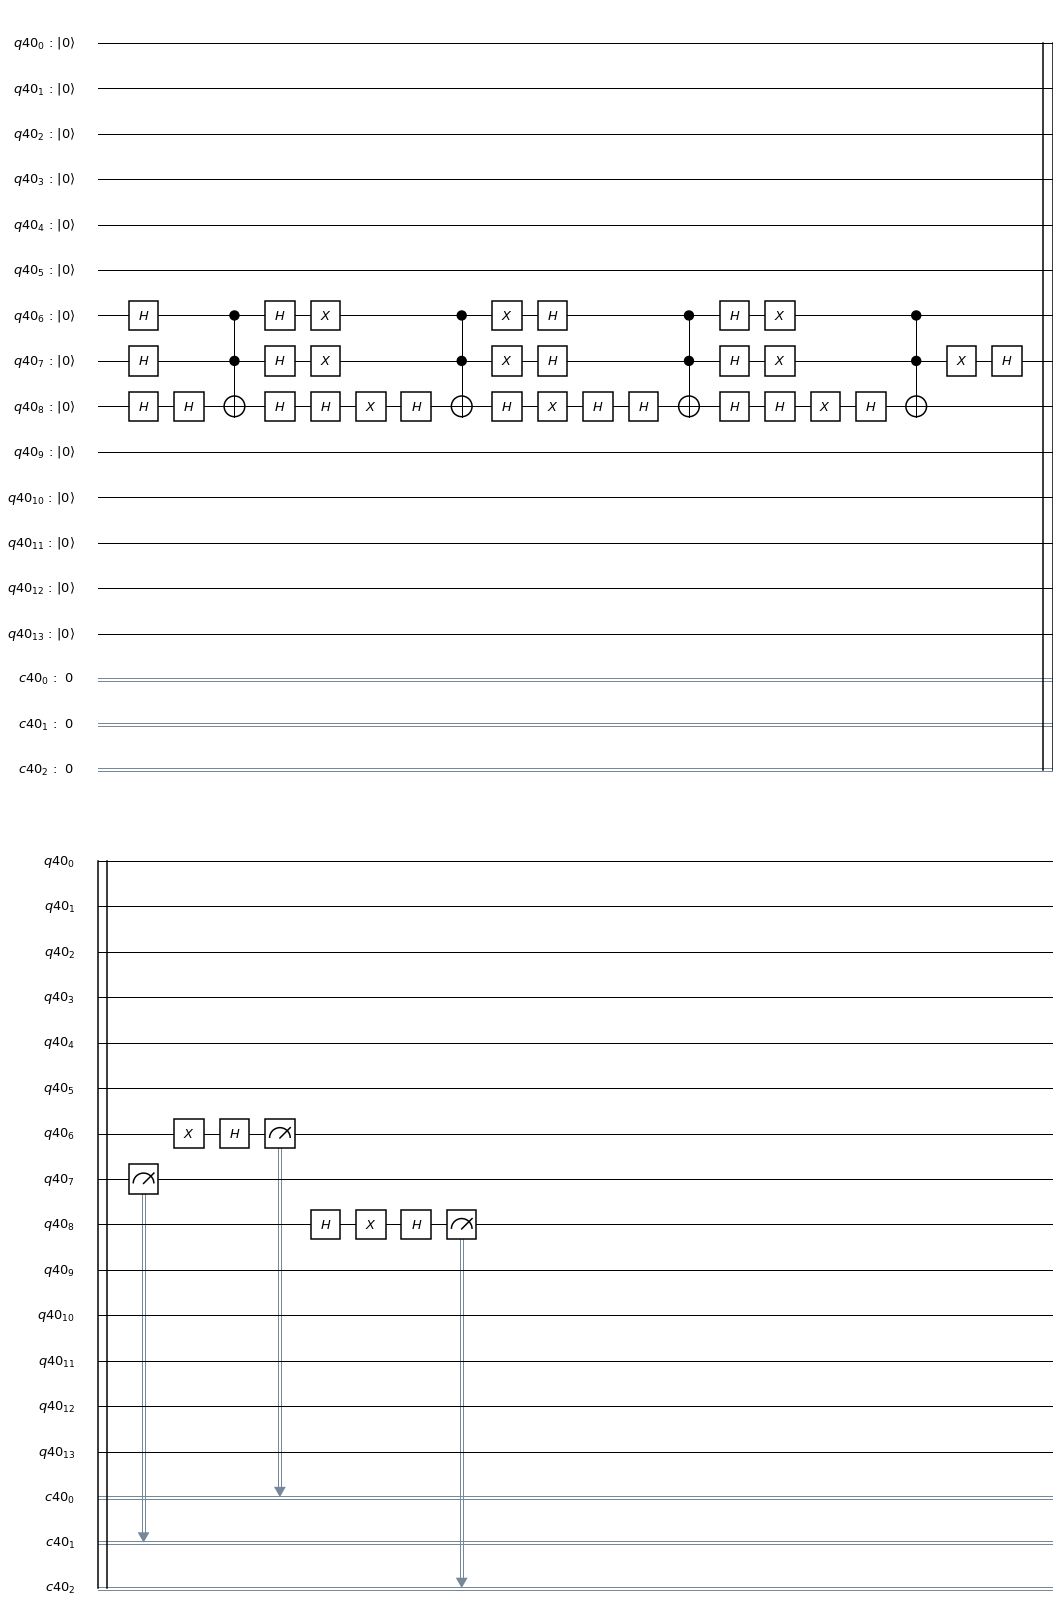

In [95]:
# N=3 Grover Search - Phase Oracle - Marked Item (111) - Qubits: 6, 7, 8 - Iterations: 2
qr = QuantumRegister(14)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

# Initialization
qc.h(qr[6])
qc.h(qr[7])
qc.h(qr[8])

# Oracle and Amplification
def repeat(): 
    # Oracle 
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    
    # Amplification
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    # CCNOT
    qc.h(qr[8])
    qc.ccx(qr[6],qr[7],qr[8])
    qc.h(qr[8])
    
    qc.x(qr[6])
    qc.x(qr[7])
    qc.x(qr[8])
    
    qc.h(qr[6])
    qc.h(qr[7])
    qc.h(qr[8])

for j in range(2):        
    repeat()


qc.measure(qr[6],cr[0])
qc.measure(qr[7],cr[1])
qc.measure(qr[8],cr[2])

qc.draw(output ="mpl")

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

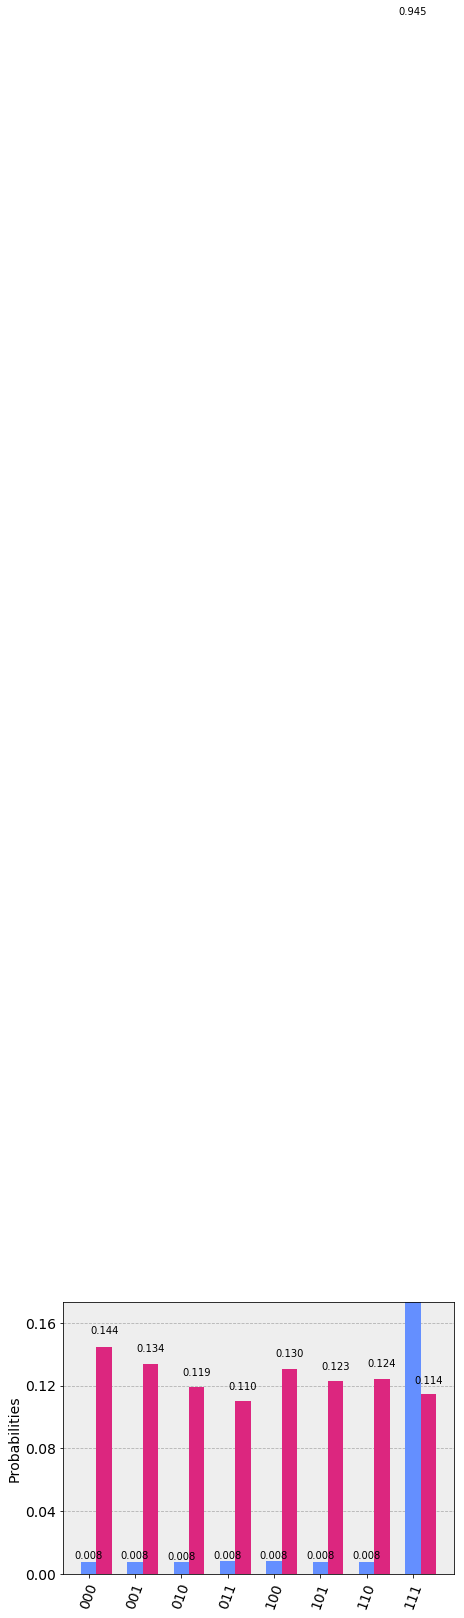

In [96]:
# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

# Run on real quantum machine
job2 = execute(qc, backend, shots=8192, max_credits=3)
job_monitor(job2)
results2 = job2.result()
counts2 = results2.get_counts()

visualization.plot_histogram([counts,counts2])

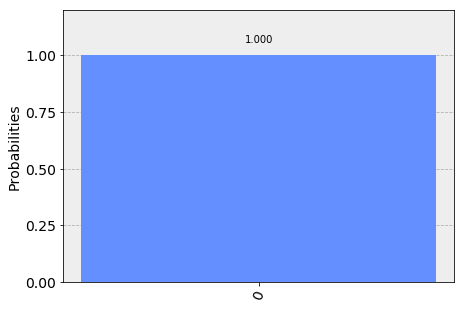

In [11]:
# DD
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr,cr)

qc.u3(np.pi/2,0,0,qr[0])

def repeat():
    qc.x(qr[0])
    qc.y(qr[0])
    qc.x(qr[0])
    qc.y(qr[0])
    
for j in range(40):        
    repeat()
    
qc.u3(-np.pi/2,0,0,qr[0])

qc.measure(qr[0],cr[0])


qc.draw(output ="latex",plot_barriers=False,scale=0.7)

# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

visualization.plot_histogram(counts)

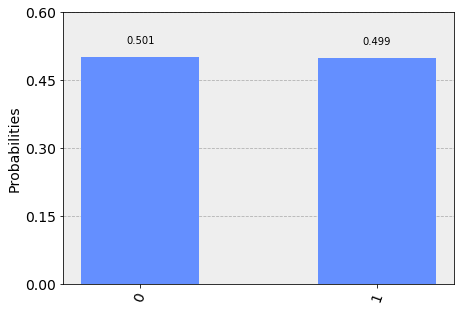

In [14]:
# DD
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr,cr)

    
qc.u3(-np.pi/2,0,0,qr[0])

qc.measure(qr[0],cr[0])


qc.draw(output ="latex",plot_barriers=False,scale=0.7)

# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

visualization.plot_histogram(counts)

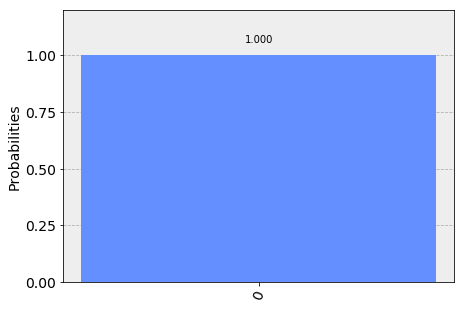

In [10]:
# DD
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr,cr)

qc.h(qr[0])

def repeat():
    qc.x(qr[0])
    qc.y(qr[0])
    qc.x(qr[0])
    qc.y(qr[0])
    
for j in range(40):        
    repeat()
    
qc.h(qr[0])

qc.measure(qr[0],cr[0])


qc.draw(output ="latex",plot_barriers=False,scale=0.7)

# Run in simulation
job = execute(qc, backend_sim, shots=100000)
result = job.result()
counts = result.get_counts(qc)

visualization.plot_histogram(counts)